# American Sign Language computer vision

In this notebook, we'll try to creating a computer vision model for [ASL Dataset](https://www.kaggle.com/grassknoted/asl-alphabet) and achieve 90% accuracy.

We'll also load in data using three different methods and see how it impacts the training time of the models.

## Data Loading Methods
  * Image Data Generator
      1. With Data Augumentation
      2. Without Data Augumentaion
  * image_dataset_from_directory
      1. Data Augumentation using experimental
  * tf.data API

Will also checkout creating small datasets from full dataset images. Remeber it's better to start out with small expeiments find out what works and scale instead of going big at the beginning leading to big experimentaion time.

In [ ]:
# Let'sget our helper function
!wget https://raw.githubusercontent.com/JpChii/ML-Tools/main/dl_helper.py

--2021-05-18 03:33:41--  https://raw.githubusercontent.com/JpChii/ML-Tools/main/dl_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17979 (18K) [text/plain]
Saving to: ‘dl_helper.py’

dl_helper.py        100%[===================>]  17.56K  --.-KB/s    in 0.001s  

2021-05-18 03:33:42 (26.2 MB/s) - ‘dl_helper.py’ saved [17979/17979]



In [ ]:
from dl_helper import unzip_data ,walk_through_dir

In [ ]:
unzip_data(filename="/content/drive/MyDrive/ML_data/asl.zip")

In [ ]:
# setup train and test directories
train_dir = "/content/asl_alphabet_train/asl_alphabet_train/"
test_dir = "/content/asl_alphabet_testasl_alphabet_test/"

In [ ]:
# Checking out the directory contents
walk_through_dir(train_dir)
walk_through_dir(test_dir)

There are 29 directories and 0 images in '/content/asl_alphabet_train/asl_alphabet_train/'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/nothing'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/Q'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/L'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/del'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/W'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/B'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/P'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/space'.
There are 0 directories and 3000 images in '/content/asl_alphabet_train/asl_alphabet_train/C'.
There are 0 directories and 3000 images i

Ther are 3000 images per class in training and 1 image per class in test data.

Before getting familiar with the data, let's create some functions to create percentage based dataset's to do small experiments.

Let's get the class names before that.

In [ ]:
from pathlib import Path
train_dir_path = Path(train_dir) # Creating a posix path

In [ ]:
class_names = []
for item in train_dir_path.glob('*'):
  class_names.append(item.parts[4])
class_names = sorted(class_names)
class_names

NameError: ignored

In [ ]:
import random, os
from tqdm.notebook import  tqdm
import shutil

In [ ]:
def get_percent_images(target_dir, new_dir, sample_amount=0.1, random_state=42):
  """
  Get  sample amount percentage of random images from target_dir and copy them to new_dir
  Args:
    target_dir (str) - file path of directory to extract images from
    new_dir (str) - new directory path to copy original images to
    sample_amount - Percentage of images to copy(eg 0.1 = 10%)
    random_state - random seed value
  """

  # Set random seed for reproducabality
  random.seed(random_state)

  # Get a list of dictionaries of images files in target_dir
  # eg -  [{"class_name":["2348348.jpg", "2829119.jpg"]}]
  images = [{dir_name: os.listdir(target_dir +  "/"+ dir_name)} for dir_name in os.listdir(target_dir)]
  for i in images:
    for k, v in i.items():
      # how many images to sample
      sample_number = round(int(len(v)*sample_amount))

      print(f"There are {len(v)} total images in '{target_dir+k}' so we're going to copay {sample_number} to the new directory.")
      print(f"Getting {sample_number} random images for {k}...")
      random_images = random.sample(v, sample_number)

      # Make new_dir for each key
      new_target_dir = new_dir + "/" + k
      print(f"Making dir: {new_target_dir}")
      os.makedirs(new_target_dir,exist_ok=True)

      # Keep track of images moved
      images_moved = []

      # Create file paths for original images and new file target
      print(f"Copying images from: {target_dir}\n\t \t to: {new_target_dir}")
      for filename in tqdm(random_images):
        og_path = target_dir + "/" + k + "/" + filename
        new_path = new_target_dir + "/" + filename

        # Copy images from OG path to new path
        shutil.copy2(og_path, new_path)
        images_moved.append(new_path)

        # Malke sure number of images moved is corect
      assert len(os.listdir(new_target_dir)) == sample_number
      assert len(images_moved) == sample_number

In [ ]:
get_percent_images(target_dir="/content/asl_alphabet_train/asl_alphabet_train",
                   new_dir="asl_10_percent",
                   sample_amount=0.1)

get_percent_images(target_dir="/content/asl_alphabet_train/asl_alphabet_train",
                   new_dir="asl_10_percent_test",
                   sample_amount=0.01)

There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainnothing' so we're going to copay 300 to the new directory.
Getting 300 random images for nothing...
Making dir: asl_10_percent/nothing
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/nothing



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainQ' so we're going to copay 300 to the new directory.
Getting 300 random images for Q...
Making dir: asl_10_percent/Q
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/Q



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainL' so we're going to copay 300 to the new directory.
Getting 300 random images for L...
Making dir: asl_10_percent/L
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/L



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_traindel' so we're going to copay 300 to the new directory.
Getting 300 random images for del...
Making dir: asl_10_percent/del
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/del



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainW' so we're going to copay 300 to the new directory.
Getting 300 random images for W...
Making dir: asl_10_percent/W
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/W



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainB' so we're going to copay 300 to the new directory.
Getting 300 random images for B...
Making dir: asl_10_percent/B
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/B



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainP' so we're going to copay 300 to the new directory.
Getting 300 random images for P...
Making dir: asl_10_percent/P
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/P



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainspace' so we're going to copay 300 to the new directory.
Getting 300 random images for space...
Making dir: asl_10_percent/space
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/space



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainC' so we're going to copay 300 to the new directory.
Getting 300 random images for C...
Making dir: asl_10_percent/C
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/C



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainT' so we're going to copay 300 to the new directory.
Getting 300 random images for T...
Making dir: asl_10_percent/T
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/T



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainK' so we're going to copay 300 to the new directory.
Getting 300 random images for K...
Making dir: asl_10_percent/K
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/K



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainF' so we're going to copay 300 to the new directory.
Getting 300 random images for F...
Making dir: asl_10_percent/F
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/F



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainZ' so we're going to copay 300 to the new directory.
Getting 300 random images for Z...
Making dir: asl_10_percent/Z
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/Z



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainX' so we're going to copay 300 to the new directory.
Getting 300 random images for X...
Making dir: asl_10_percent/X
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/X



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainY' so we're going to copay 300 to the new directory.
Getting 300 random images for Y...
Making dir: asl_10_percent/Y
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/Y



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainS' so we're going to copay 300 to the new directory.
Getting 300 random images for S...
Making dir: asl_10_percent/S
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/S



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainH' so we're going to copay 300 to the new directory.
Getting 300 random images for H...
Making dir: asl_10_percent/H
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/H



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainM' so we're going to copay 300 to the new directory.
Getting 300 random images for M...
Making dir: asl_10_percent/M
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/M



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainU' so we're going to copay 300 to the new directory.
Getting 300 random images for U...
Making dir: asl_10_percent/U
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/U



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainG' so we're going to copay 300 to the new directory.
Getting 300 random images for G...
Making dir: asl_10_percent/G
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/G



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainJ' so we're going to copay 300 to the new directory.
Getting 300 random images for J...
Making dir: asl_10_percent/J
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/J



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainN' so we're going to copay 300 to the new directory.
Getting 300 random images for N...
Making dir: asl_10_percent/N
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/N



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainA' so we're going to copay 300 to the new directory.
Getting 300 random images for A...
Making dir: asl_10_percent/A
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/A



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainO' so we're going to copay 300 to the new directory.
Getting 300 random images for O...
Making dir: asl_10_percent/O
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/O



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainE' so we're going to copay 300 to the new directory.
Getting 300 random images for E...
Making dir: asl_10_percent/E
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/E



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainI' so we're going to copay 300 to the new directory.
Getting 300 random images for I...
Making dir: asl_10_percent/I
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/I



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainD' so we're going to copay 300 to the new directory.
Getting 300 random images for D...
Making dir: asl_10_percent/D
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/D



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainV' so we're going to copay 300 to the new directory.
Getting 300 random images for V...
Making dir: asl_10_percent/V
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/V



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainR' so we're going to copay 300 to the new directory.
Getting 300 random images for R...
Making dir: asl_10_percent/R
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent/R



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainnothing' so we're going to copay 30 to the new directory.
Getting 30 random images for nothing...
Making dir: asl_10_percent_test/nothing
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/nothing



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainQ' so we're going to copay 30 to the new directory.
Getting 30 random images for Q...
Making dir: asl_10_percent_test/Q
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/Q



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainL' so we're going to copay 30 to the new directory.
Getting 30 random images for L...
Making dir: asl_10_percent_test/L
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/L



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_traindel' so we're going to copay 30 to the new directory.
Getting 30 random images for del...
Making dir: asl_10_percent_test/del
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/del



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainW' so we're going to copay 30 to the new directory.
Getting 30 random images for W...
Making dir: asl_10_percent_test/W
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/W



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainB' so we're going to copay 30 to the new directory.
Getting 30 random images for B...
Making dir: asl_10_percent_test/B
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/B



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainP' so we're going to copay 30 to the new directory.
Getting 30 random images for P...
Making dir: asl_10_percent_test/P
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/P



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainspace' so we're going to copay 30 to the new directory.
Getting 30 random images for space...
Making dir: asl_10_percent_test/space
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/space



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainC' so we're going to copay 30 to the new directory.
Getting 30 random images for C...
Making dir: asl_10_percent_test/C
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/C



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainT' so we're going to copay 30 to the new directory.
Getting 30 random images for T...
Making dir: asl_10_percent_test/T
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/T



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainK' so we're going to copay 30 to the new directory.
Getting 30 random images for K...
Making dir: asl_10_percent_test/K
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/K



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainF' so we're going to copay 30 to the new directory.
Getting 30 random images for F...
Making dir: asl_10_percent_test/F
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/F



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainZ' so we're going to copay 30 to the new directory.
Getting 30 random images for Z...
Making dir: asl_10_percent_test/Z
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/Z



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainX' so we're going to copay 30 to the new directory.
Getting 30 random images for X...
Making dir: asl_10_percent_test/X
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/X



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainY' so we're going to copay 30 to the new directory.
Getting 30 random images for Y...
Making dir: asl_10_percent_test/Y
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/Y



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainS' so we're going to copay 30 to the new directory.
Getting 30 random images for S...
Making dir: asl_10_percent_test/S
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/S



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainH' so we're going to copay 30 to the new directory.
Getting 30 random images for H...
Making dir: asl_10_percent_test/H
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/H



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainM' so we're going to copay 30 to the new directory.
Getting 30 random images for M...
Making dir: asl_10_percent_test/M
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/M



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainU' so we're going to copay 30 to the new directory.
Getting 30 random images for U...
Making dir: asl_10_percent_test/U
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/U



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainG' so we're going to copay 30 to the new directory.
Getting 30 random images for G...
Making dir: asl_10_percent_test/G
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/G



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainJ' so we're going to copay 30 to the new directory.
Getting 30 random images for J...
Making dir: asl_10_percent_test/J
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/J



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainN' so we're going to copay 30 to the new directory.
Getting 30 random images for N...
Making dir: asl_10_percent_test/N
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/N



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainA' so we're going to copay 30 to the new directory.
Getting 30 random images for A...
Making dir: asl_10_percent_test/A
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/A



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainO' so we're going to copay 30 to the new directory.
Getting 30 random images for O...
Making dir: asl_10_percent_test/O
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/O



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainE' so we're going to copay 30 to the new directory.
Getting 30 random images for E...
Making dir: asl_10_percent_test/E
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/E



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainI' so we're going to copay 30 to the new directory.
Getting 30 random images for I...
Making dir: asl_10_percent_test/I
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/I



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainD' so we're going to copay 30 to the new directory.
Getting 30 random images for D...
Making dir: asl_10_percent_test/D
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/D



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainV' so we're going to copay 30 to the new directory.
Getting 30 random images for V...
Making dir: asl_10_percent_test/V
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/V



There are 3000 total images in '/content/asl_alphabet_train/asl_alphabet_trainR' so we're going to copay 30 to the new directory.
Getting 30 random images for R...
Making dir: asl_10_percent_test/R
Copying images from: /content/asl_alphabet_train/asl_alphabet_train
	 	 to: asl_10_percent_test/R


In [ ]:
walk_through_dir("/content/asl_10_percent")
walk_through_dir("/content/asl_10_percent_test")

There are 29 directories and 0 images in '/content/asl_10_percent'.
There are 0 directories and 300 images in '/content/asl_10_percent/nothing'.
There are 0 directories and 300 images in '/content/asl_10_percent/Q'.
There are 0 directories and 300 images in '/content/asl_10_percent/L'.
There are 0 directories and 300 images in '/content/asl_10_percent/del'.
There are 0 directories and 300 images in '/content/asl_10_percent/W'.
There are 0 directories and 300 images in '/content/asl_10_percent/B'.
There are 0 directories and 300 images in '/content/asl_10_percent/P'.
There are 0 directories and 300 images in '/content/asl_10_percent/space'.
There are 0 directories and 300 images in '/content/asl_10_percent/C'.
There are 0 directories and 300 images in '/content/asl_10_percent/T'.
There are 0 directories and 300 images in '/content/asl_10_percent/K'.
There are 0 directories and 300 images in '/content/asl_10_percent/F'.
There are 0 directories and 300 images in '/content/asl_10_percent/Z

Now we've got a function to get sample of images from total dataset.

let's get one with the data now

## Getting the data ready

In [ ]:
# Setting up 10 percent train directory
train_dir_10_percent = "/content/asl_10_percent"
test_dir_1_percent = "/content/asl_10_percent_test"

In [ ]:
import matplotlib.pyplot as plt
import os, random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def view_random_image(target_dir, classes):
  """
  Function to view random images in computer vision

  PreRequisite:
    Standard Computer vision directory structure

  Args:
    target_dir: Directory from wherer images are picked
    classes: list of classes
  """
  target_class = random.choice(classes)
  target_dir = target_dir + "/" + target_class
  target_image = random.choice(os.listdir(target_dir))
  img_path = target_dir + "/" + target_image

  loaded_image = load_img(img_path)
  image_array = img_to_array(loaded_image)

  plt.imshow(image_array/255.)
  plt.axis(False)
  plt.title(f"Class: {target_class}, Shape: {image_array.shape}")

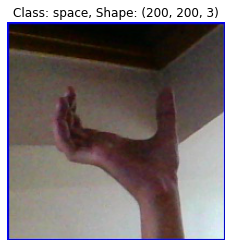

In [ ]:
view_random_image(target_dir=train_dir_10_percent,
                  classes=class_names)

In [ ]:
import matplotlib.pyplot as plt
import os, random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to view multiple images
def view_many_random_images(num_rows, num_cols, target_dir, classes):
  """
  To get one with the data, function to view multiple images using `view_random_image`

  PreRequisite:
  Standard Computer vision directory structure

  Args:
    num_rows: number of rows
    num_cols: number of columns
    target_dir: Directory from wherer images are picked
    classes: list of classes
    num_rows * num_images random images will be plotted
  """

  num_images = num_rows * num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for image in range(num_images):
    plt.subplot(num_rows, num_cols, image + 1)
    view_random_image(target_dir=target_dir,
                      classes=classes)

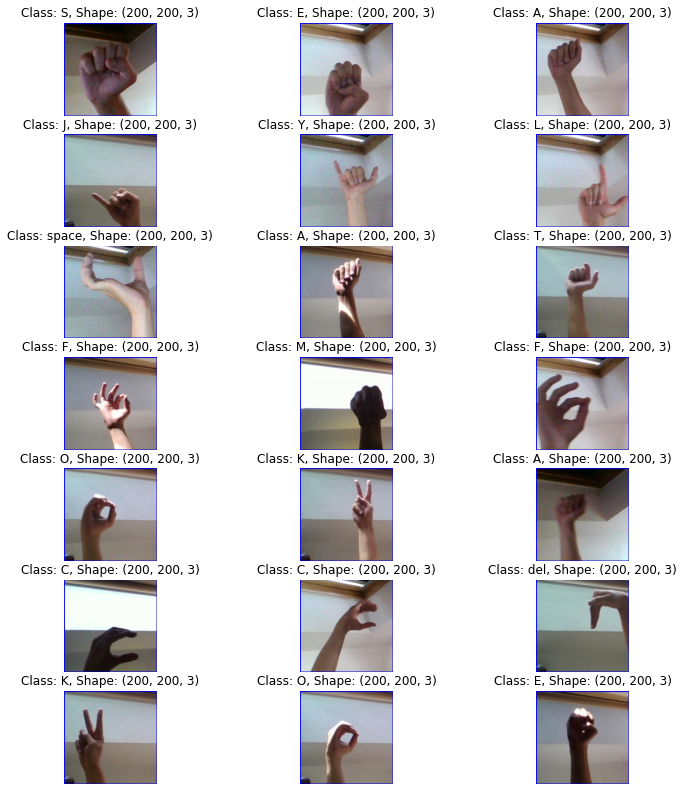

In [ ]:
view_many_random_images(num_rows=7,
                        num_cols=3,
                        target_dir=train_dir_10_percent,
                        classes=class_names)

After viewing many images using `view_multiple_random_images`, all the images are in `(200, 200, 3)` shape.

Next let's load the data in three different methods to check the impact on training time.

## 2. Loading the data

### 2.1 Using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up datagen instances
train_datagen_10_percent = ImageDataGenerator(rescale=1/255.)
test_datagen_1_percent = ImageDataGenerator(rescale=1/255.)

train_data_10_percent = train_datagen_10_percent.flow_from_directory(directory=train_dir_10_percent,
                                                                     target_size=(224, 224),
                                                                     class_mode='categorical',
                                                                     batch_size=32,
                                                                     shuffle=True)

test_data_1_percent = test_datagen_1_percent.flow_from_directory(directory=test_dir_1_percent,
                                                                     target_size=(224, 224),
                                                                     class_mode='categorical',
                                                                     batch_size=32)

Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


### 2.2 ImageDataGenerator using DataAugumentation

In [ ]:
# Setting up datagen instances
train_data_10_percent_aug = ImageDataGenerator(rescale=1/255.,
                                               horizontal_flip=True,
                                               zoom_range=0.2,
                                               rotation_range=0.2,
                                               width_shift_range=0.2,
                                               height_shift_range=0.2)

train_data_10_percent_aug = train_data_10_percent_aug.flow_from_directory(directory=train_dir_10_percent,
                                                                     target_size=(224, 224),
                                                                     class_mode='categorical',
                                                                     batch_size=32)

Found 8700 images belonging to 29 classes.


### 2.3 image_dataset_from_directory

In [ ]:
train_data_10_percent_idfd = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                                 label_mode='categorical',
                                                                                 image_size=(224,224),
                                                                                 batch_size=32,
                                                                                 shuffle=True)

test_data_1_percent_idfd = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_1_percent,
                                                                                 label_mode='categorical',
                                                                                 image_size=(224,224),
                                                                                 batch_size=32)

Found 8700 files belonging to 29 classes.
Found 870 files belonging to 29 classes.


### 2.4 tf.data API

[Using this document](https://www.tensorflow.org/tutorials/load_data/images#using_tfdata_for_finer_control)

In [ ]:
# Getting the image count
train_dir_path_10_percent = Path("/content/asl_10_percent")
test_dir_path_1_percent = Path("/content/asl_10_percent_test")
image_count_train = len(list(train_dir_path_10_percent.glob('*/*.jpg')))
image_count_test = len(list(test_dir_path_1_percent.glob('*/*.jpg')))

In [ ]:
# Getting the list of files for train
train_ds = tf.data.Dataset.list_files(file_pattern=str(train_dir_path_10_percent/'*/*'), shuffle=False)
train_ds = train_ds.shuffle(buffer_size=1000, reshuffle_each_iteration=False)

In [ ]:
# Getting the list of files for test
test_ds = tf.data.Dataset.list_files(file_pattern=str(test_dir_path_1_percent/'*/*'), shuffle=False)
test_ds = test_ds.shuffle(buffer_size=1000, reshuffle_each_iteration=False)

In [ ]:
len(train_ds)

8700

In [ ]:
# Checking out the file list
for file in train_ds.take(5):
   print(file)

tf.Tensor(b'/content/asl_10_percent/B/B2905.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/B/B2574.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/C/C510.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/A/A1819.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/asl_10_percent/C/C2214.jpg', shape=(), dtype=string)


### Preprocessing functions for `tf.data API`

In [ ]:
import numpy as np
# Writing a short function to return image and label to map over all the images
def get_label(file_path):
  part = tf.strings.split(file_path, os.path.sep)

  # One hot encode the label
  one_hot = part[4] == class_names
  return tf.one_hot(tf.argmax(one_hot), 29)

def decode_image(img):
  # Convert the compressed string to a uint8 tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image to desired shape
  return tf.image.resize(img, [img_size, img_size])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_image(img)

  return img, label

In [ ]:
get_label("/content/asl_10_percent/A/A101.jpg")

<tf.Tensor: shape=(29,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Now we've written the functions for preprocessing, let's load in the data.

In [ ]:
# Train
img_size = 224
train_data_10_percent_da = train_ds.map(map_func=process_path,
                                       num_parallel_calls=tf.data.AUTOTUNE)

train_data_10_percent_da = train_data_10_percent_da.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Test
img_size = 224
test_data_1_percent_da = test_ds.map(map_func=process_path,
                                       num_parallel_calls=tf.data.AUTOTUNE)

test_data_1_percent_da = test_data_1_percent_da.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Now training loaded in three different methods are available, let's check out one sample data from all three methods and proceed with modelling.

In [ ]:
# ImageDataGenerator
train_1s_idg = train_data_10_percent.next()
for i in train_1s_idg:
 print(i.shape)
 print(i[0])
 print(tf.reduce_max(i), tf.reduce_min(i))

(32, 224, 224, 3)
[[[0.         0.01960784 0.97647065]
  [0.00784314 0.02745098 1.        ]
  [0.00392157 0.         0.9803922 ]
  ...
  [0.01568628 0.00392157 1.        ]
  [0.         0.         0.9921569 ]
  [0.         0.01960784 1.        ]]

 [[0.         0.03529412 1.        ]
  [0.         0.         0.9058824 ]
  [0.09803922 0.02745098 0.8117648 ]
  ...
  [0.0509804  0.00784314 0.7137255 ]
  [0.04705883 0.03137255 0.8196079 ]
  [0.         0.         0.9294118 ]]

 [[0.         0.         0.98823535]
  [0.0509804  0.01960784 0.79215693]
  [0.47450984 0.4039216  0.7254902 ]
  ...
  [0.39607847 0.35686275 0.5019608 ]
  [0.36078432 0.32941177 0.7568628 ]
  [0.03921569 0.02352941 0.8117648 ]]

 ...

 [[0.01960784 0.         1.        ]
  [0.03921569 0.03921569 0.7686275 ]
  [0.78823537 0.83921576 1.        ]
  ...
  [0.54901963 0.43137258 0.32156864]
  [0.47450984 0.37254903 0.61960787]
  [0.05882353 0.         0.72156864]]

 [[0.00392157 0.         0.9960785 ]
  [0.01176471 0.019

The image is in `(32, 224, 224, 3)` shape and label is in `(32, 39)` shape.
Labels are one-hot encoded in ImageDataGenerator.


In [ ]:
# image_dataset_from_directory
train_1s_idfd = train_data_10_percent_idfd.take(1)
for i, l in train_1s_idfd:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")
  print(f"Dtype: {i[0].dtype}")

Shape of the image: (TensorShape([32, 224, 224, 3]),)
Shape of the label: (32, 29)
Image : [[[0.0000000e+00 1.0000000e+00 2.5100000e+02]
  [0.0000000e+00 1.8392857e+00 2.4848215e+02]
  [1.4642856e+00 5.3571439e-01 2.4141072e+02]
  ...
  [0.0000000e+00 0.0000000e+00 2.4033926e+02]
  [0.0000000e+00 1.6070557e-01 2.4480353e+02]
  [0.0000000e+00 1.0000000e+00 2.4900000e+02]]

 [[0.0000000e+00 2.6785715e+00 2.5100000e+02]
  [0.0000000e+00 7.0025504e-01 2.3228093e+02]
  [8.8380089e+00 5.0019131e+00 2.1350447e+02]
  ...
  [4.8109093e+00 1.9033765e+00 2.0074289e+02]
  [3.6569171e+00 2.2739291e+00 2.1680733e+02]
  [8.3928573e-01 1.0000000e+00 2.2382143e+02]]

 [[0.0000000e+00 8.0357158e-01 2.4221428e+02]
  [6.1447701e+00 5.6594386e+00 2.1301913e+02]
  [5.0269447e+01 4.4608410e+01 1.9058929e+02]
  ...
  [1.0271493e+02 1.0032271e+02 2.0895387e+02]
  [8.6148758e+01 8.3999527e+01 2.3274449e+02]
  [9.0535707e+00 6.1249995e+00 1.7946429e+02]]

 ...

 [[2.1964417e+00 0.0000000e+00 2.4073215e+02]
  [3.

The image is in `(32, 224, 224, 3)` shape and label is in `(32, 39)` shape.
Labels are one-hot encoded in image_dataset_from_directory.

In [ ]:
# tf.data
train_1s_da = train_data_10_percent_da.take(1)
for i, l in train_1s_da:
  print(f"Shape of the image: {i.shape,}")
  print(f"Shape of the label: {l.shape}")
  print(f"Image : {i[0]}")
  print(f"Label: {l[0]}")
  print(tf.reduce_max(i), tf.reduce_min(i))

Shape of the image: (TensorShape([32, 224, 224, 3]),)
Shape of the label: (32, 29)
Image : [[[  0.           2.         244.        ]
  [  0.           0.32142854 240.64285   ]
  [  1.4642856    0.         241.46428   ]
  ...
  [  0.26785278   0.         239.60712   ]
  [  0.83929443   0.         244.        ]
  [  0.           0.         244.        ]]

 [[  0.           2.         244.        ]
  [  0.           0.32142854 229.37244   ]
  [  5.765625     1.2289541  209.6014    ]
  ...
  [  4.074606     1.1240251  198.00244   ]
  [  5.470375     4.0615506  218.087     ]
  [  2.517857     3.357143   223.01785   ]]

 [[  0.           0.5357144  239.60715   ]
  [  4.9158163    3.158482   209.30293   ]
  [ 73.5542      65.69674    208.72958   ]
  ...
  [ 83.71813     79.12948    190.88531   ]
  [ 68.48528     64.53565    218.30267   ]
  [ 11.053571     8.392857   182.39285   ]]

 ...

 [[  0.           0.         239.14282   ]
  [  0.61448073   3.0724037  200.59561   ]
  [156.82239    167

The image is in `(32, 224, 224, 3)` shape and label is in `(32, 39)` shape.
Labels are one-hot encoded in image_dataset_from_directory.

Okay all three data loading techniques have the same image and label shape. Now let's build a model and compare the impact of a good input pipeline on the training time.

In [ ]:
# Building the model
from tensorflow.keras import layers
inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = layers.Conv2D(filters=10,
                  kernel_size=(3,3),
                  strides=(1,1),
                  padding='valid',
                  name="conv1_layer")(inputs)
x = layers.MaxPool2D(pool_size=(2,2),
                     strides=(1,1),
                     padding='valid',
                    name="maxpool1_layer")(x)
x = layers.Dropout(rate=0.5, name="dropout1_layer")(x)
x = layers.Conv2D(filters=10,
                  kernel_size=(3,3),
                  strides=(1,1),
                  padding='valid',
                  name="conv2_layer")(x)
x = layers.MaxPool2D(pool_size=(2,2),
                     strides=(1,1),
                     padding='valid',
                    name="maxpool2_layer")(x)
x = layers.Dropout(rate=0.5, name="dropout2_layer")(x)
x = layers.Flatten(name="faltten_layer")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_idg = tf.keras.Model(inputs, outputs)

In [ ]:
model_idg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_layer (Conv2D)         (None, 222, 222, 10)      280       
_________________________________________________________________
maxpool1_layer (MaxPooling2D (None, 221, 221, 10)      0         
_________________________________________________________________
dropout1_layer (Dropout)     (None, 221, 221, 10)      0         
_________________________________________________________________
conv2_layer (Conv2D)         (None, 219, 219, 10)      910       
_________________________________________________________________
maxpool2_layer (MaxPooling2D (None, 218, 218, 10)      0         
_________________________________________________________________
dropout2_layer (Dropout)     (None, 218, 218, 10)      0     

That's a lot of trainable parameters :|. Let's see how this model goes on the data in a CPU.

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 124 µs (started: 2021-05-15 05:31:27 +00:00)


In [ ]:
# # Compile the model
# model_idg.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_idg = model_idg.fit(train_data_10_percent,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_10_percent),
#                         validation_data=test_data_1_percent)

Epoch 1/5
272/272 [==============================] - 52s 73ms/step - loss: 23.6087 - accuracy: 0.0796 - val_loss: 151.5578 - val_accuracy: 0.0345
Epoch 2/5
272/272 [==============================] - 19s 71ms/step - loss: 3.2148 - accuracy: 0.2926 - val_loss: 37.5309 - val_accuracy: 0.0345
Epoch 3/5
272/272 [==============================] - 19s 71ms/step - loss: 1.4676 - accuracy: 0.5529 - val_loss: 11.1083 - val_accuracy: 0.1207
Epoch 4/5
272/272 [==============================] - 19s 70ms/step - loss: 0.9024 - accuracy: 0.7287 - val_loss: 8.0566 - val_accuracy: 0.1598
Epoch 5/5
272/272 [==============================] - 19s 70ms/step - loss: 0.6653 - accuracy: 0.8026 - val_loss: 6.4802 - val_accuracy: 0.2034
time: 2min 9s (started: 2021-05-11 13:01:58 +00:00)


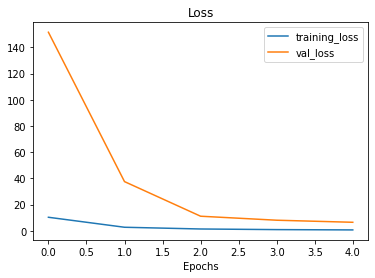

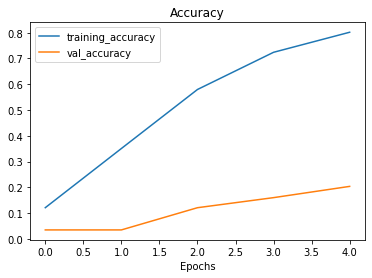

time: 348 ms (started: 2021-05-11 13:04:07 +00:00)


In [ ]:
# from dl_helper import plot_loss_curves
# plot_loss_curves(history_idg)

In [ ]:
# model_idg_da = tf.keras.Model(inputs, outputs)

# # Compile the model
# model_idg_da.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_idg_da_aug = model_idg_da.fit(train_data_10_percent_aug,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_10_percent_aug),
#                         validation_data=test_data_1_percent)

Epoch 1/5
272/272 [==============================] - 95s 348ms/step - loss: 8.7031 - accuracy: 0.0666 - val_loss: 13.0891 - val_accuracy: 0.0368
Epoch 2/5
272/272 [==============================] - 95s 348ms/step - loss: 3.6579 - accuracy: 0.1029 - val_loss: 9.4951 - val_accuracy: 0.0356
Epoch 3/5
272/272 [==============================] - 95s 351ms/step - loss: 3.4403 - accuracy: 0.1064 - val_loss: 11.6638 - val_accuracy: 0.0345
Epoch 4/5
272/272 [==============================] - 94s 346ms/step - loss: 3.2949 - accuracy: 0.1257 - val_loss: 8.5636 - val_accuracy: 0.0391
Epoch 5/5
272/272 [==============================] - 94s 345ms/step - loss: 3.2899 - accuracy: 0.1245 - val_loss: 13.2588 - val_accuracy: 0.0345
time: 7min 53s (started: 2021-05-11 13:04:07 +00:00)


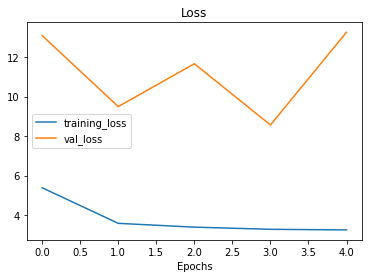

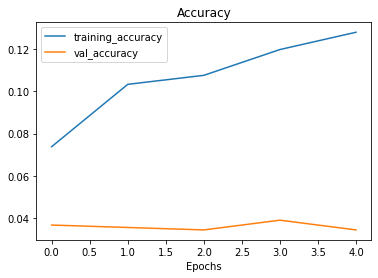

time: 346 ms (started: 2021-05-11 13:12:01 +00:00)


In [ ]:
# from dl_helper import plot_loss_curves
# plot_loss_curves(history_idg_da_aug)

In [ ]:
# model_idfd = tf.keras.Model(inputs, outputs)

# # Compile the model
# model_idfd.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_idfd = model_idfd.fit(train_data_10_percent_idfd,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_10_percent_idfd),
#                          validation_data=test_data_1_percent_idfd)

Epoch 1/5
272/272 [==============================] - 24s 85ms/step - loss: 290.6683 - accuracy: 0.3438 - val_loss: 549.9110 - val_accuracy: 0.1425
Epoch 2/5
272/272 [==============================] - 23s 84ms/step - loss: 67.6863 - accuracy: 0.6301 - val_loss: 442.9759 - val_accuracy: 0.1862
Epoch 3/5
272/272 [==============================] - 23s 83ms/step - loss: 40.1613 - accuracy: 0.7263 - val_loss: 397.2718 - val_accuracy: 0.1690
Epoch 4/5
272/272 [==============================] - 23s 83ms/step - loss: 28.3496 - accuracy: 0.7962 - val_loss: 404.3855 - val_accuracy: 0.1874
Epoch 5/5
272/272 [==============================] - 23s 83ms/step - loss: 23.9092 - accuracy: 0.8178 - val_loss: 437.2661 - val_accuracy: 0.1862
time: 1min 55s (started: 2021-05-11 13:12:02 +00:00)


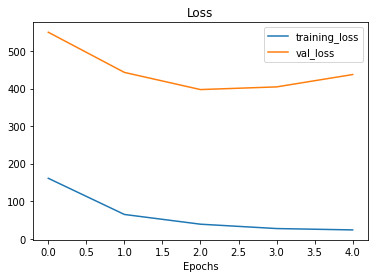

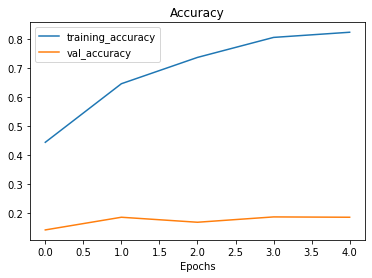

time: 499 ms (started: 2021-05-11 13:13:58 +00:00)


In [ ]:
# from dl_helper import plot_loss_curves
# plot_loss_curves(history_idfd)

In [ ]:
# model_da = tf.keras.Model(inputs, outputs)

# # Compile the model
# model_da.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])
# # Fit the model
# history_da = model_da.fit(train_data_10_percent_da,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_10_percent_da),
#                        validation_data=test_data_1_percent_da)

Epoch 1/5
272/272 [==============================] - 15s 50ms/step - loss: 31.5428 - accuracy: 0.9585 - val_loss: 13804.7012 - val_accuracy: 0.0000e+00
Epoch 2/5
272/272 [==============================] - 14s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 13804.7031 - val_accuracy: 0.0000e+00
Epoch 3/5
272/272 [==============================] - 14s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 13804.7012 - val_accuracy: 0.0000e+00
Epoch 4/5
272/272 [==============================] - 14s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 13804.7021 - val_accuracy: 0.0000e+00
Epoch 5/5
272/272 [==============================] - 14s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 13804.7002 - val_accuracy: 0.0000e+00
time: 1min 13s (started: 2021-05-11 13:13:58 +00:00)


In [ ]:
# from dl_helper import plot_loss_curves
# plot_loss_curves(history_da)

For 8700 images for 29 classes,

The trainig time is listed from smallest to largest,
  1. tf.data - `1min 8s`
  2. ImageDataGenerator - `1min 29s`
  3. image_dataset_from_directory - `1min 51s`
  4. ImageDataGenerator with data augumentation - `7min 57s`

`tf.data` API we've used prefetch, what it does is while batching of data is happening, it prefetches the data for next batch, reducing the loading time and in turn training time compared to other methods.

`ImageDataGenerator with data_aumentation` takes the most time, becuase augumentaion is done in CPU during runtime and trained in GPU. But out of all the methods this gave the better performance on validation data.

For 1 and 3, we can add data augumentation as a layer in our model using `tf.keras.preprocessing.experimental`.

[Detailed blog on the data loading techniques used](https://jpchii.github.io/2021/05/05/Preparing-image-dataset-using-tensorflow.html)

Now that's out of the way, validation accuracy scores(0.34) of our mini modelis worse than guessing. I've tried EfficientNetB0 and B4 in my previous experiments and they performed pretty well. SO in this notebook am going to use `ResNet*` as our base model.

The datasets usedfor exploration of data loading techniques is not ideal for modelling. Since test dataset has only a single image per class, it cannot be used for evaluating the model properly.

On the other hand, there are 3000 images per class in training dataset, we'll split the train dtaset into train and test.

### Preprocessing data using `tf.data API` for Transfer Learning

In [ ]:
from pathlib import  Path
data_directory = "/content/asl_alphabet_train/asl_alphabet_train"
data_dir_path = Path(data_directory)
image_count = len(list(data_dir_path.glob('*/*.jpg')))
import tensorflow as tf
list_ds = tf.data.Dataset.list_files(file_pattern=str(data_dir_path/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
import numpy as np
class_names = np.array(sorted([item.name for item in data_dir_path.glob('*')]))
print(class_names[:10])

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']


In [ ]:
# Checking the image count with files list
len(class_names) * 3000 == len(list_ds)

True

In [ ]:
# Setting up val, train and test sizes
test_size = int(image_count * 0.2)
val_size = int(image_count * 0.1)
train_size = image_count - (test_size + val_size)
print(f"Train images count: {train_size}")
print(f"Val images count: {val_size}")
print(f"Test images count: {test_size}")
print(f"Is total image count equal to the sum of split: {(train_size + val_size + test_size) == image_count}")

Train images count: 60900
Val images count: 8700
Test images count: 17400
Is total image count equal to the sum of split: True


In [ ]:
# Splitting the dataset
train_ds = list_ds.skip(test_size + val_size)
val_ds = list_ds.take(val_size)
test_ds = list_ds.take(test_size)

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

(60900, 8700, 17400)

In [ ]:
import os, random

# Setting up the image size
img_size = 224

# Setting up the input pipeline to load the data
# Load in the training data
train_data = train_ds.map(map_func=process_path,
                          num_parallel_calls=tf.data.AUTOTUNE)

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load in the validation data
val_data = val_ds.map(map_func=process_path,
                      num_parallel_calls=tf.data.AUTOTUNE)

val_data = val_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load in the test data
test_data = test_ds.map(map_func=process_path,
                        num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Now we loaded in all the data after splitting them. But to start with small experiments, let's use `tf.dataset.take` and do this

In [ ]:
train_20_percent_size = int(train_size * 0.2)
train_20_percent_ds = train_ds.take(train_20_percent_size)

# Load in the train 20 percent data
train_data_20_percent = train_20_percent_ds.map(map_func=process_path,
                                                num_parallel_calls=tf.data.AUTOTUNE)

train_data_20_percent = train_data_20_percent.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Now let's build model and train it.

In [ ]:
# Importing the libraries
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Model

In [ ]:
# Importing the base model
base_model = applications.ResNet101(include_top=False)
base_model.trainable = False

171450368/171446536 [==============================] - 4s 0us/step


In [ ]:
# Building the model
inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = preprocessing.Rescaling(1/255., name="scale_layer")(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pool_layer")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model = Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model.fit(train_data_20_percent,
                      epochs=3,
                      steps_per_epoch=len(train_data_20_percent),
                      validation_data=val_data)

Epoch 1/3
381/381 [==============================] - 169s 350ms/step - loss: 3.3452 - accuracy: 0.0655 - val_loss: 3.1546 - val_accuracy: 0.1422
Epoch 2/3
381/381 [==============================] - 133s 347ms/step - loss: 3.1378 - accuracy: 0.1236 - val_loss: 3.0157 - val_accuracy: 0.1701
Epoch 3/3
381/381 [==============================] - 133s 347ms/step - loss: 3.0210 - accuracy: 0.1654 - val_loss: 2.9228 - val_accuracy: 0.1845


In [ ]:
from dl_helper import plot_loss_curves, compare_historys

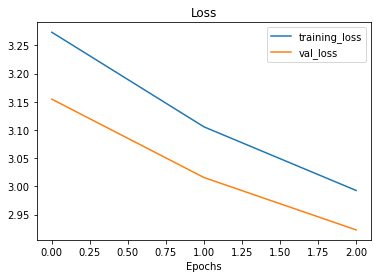

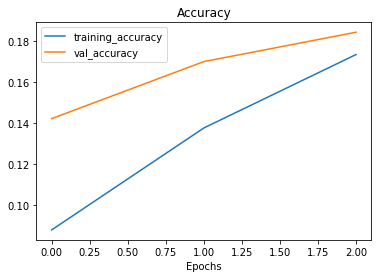

In [ ]:
plot_loss_curves(history_1)

val curve's are closely following train curves, that's good. Looks like the model might improve if trained for more_epochs. Let's do that.

In [ ]:
history_2 = model.fit(train_data_20_percent,
                      initial_epoch=history_1.epoch[-1],
                      epochs=10,
                      steps_per_epoch=len(train_data_20_percent),
                      validation_data=val_data)

Epoch 3/10
381/381 [==============================] - 132s 345ms/step - loss: 2.9036 - accuracy: 0.2011 - val_loss: 2.8693 - val_accuracy: 0.2167
Epoch 4/10
381/381 [==============================] - 133s 346ms/step - loss: 2.8320 - accuracy: 0.2182 - val_loss: 2.7917 - val_accuracy: 0.2290
Epoch 5/10
381/381 [==============================] - 133s 347ms/step - loss: 2.7703 - accuracy: 0.2332 - val_loss: 2.7344 - val_accuracy: 0.2463
Epoch 6/10
381/381 [==============================] - 133s 346ms/step - loss: 2.7198 - accuracy: 0.2458 - val_loss: 2.6929 - val_accuracy: 0.2344
Epoch 7/10
381/381 [==============================] - 133s 346ms/step - loss: 2.6659 - accuracy: 0.2665 - val_loss: 2.6546 - val_accuracy: 0.2561
Epoch 8/10
381/381 [==============================] - 133s 346ms/step - loss: 2.6254 - accuracy: 0.2759 - val_loss: 2.6098 - val_accuracy: 0.2672
Epoch 9/10
381/381 [==============================] - 132s 346ms/step - loss: 2.5837 - accuracy: 0.2906 - val_loss: 2.5481 -

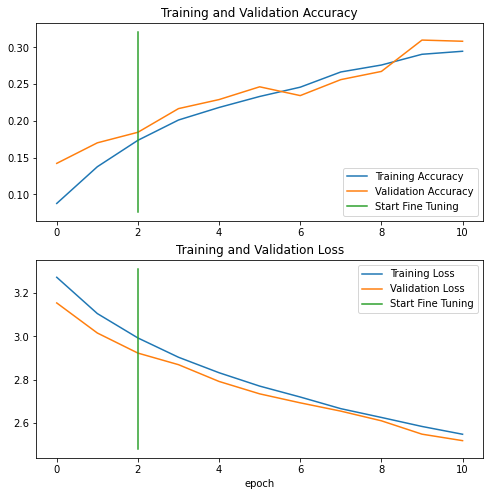

In [ ]:
compare_historys(history_1, history_2, initial_epochs=3)

The model is definitley learning, but the convergence(learning) is slow. We can find the ideal learning rate and train on it which can speed up the training.

## Finding the ideal learning rate

In [ ]:
# Creating lr schdeiuler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

time: 990 µs (started: 2021-05-15 05:33:24 +00:00)


In [ ]:
# LEt's train for 5 more epochs to find ideal learning rate
history_3 = model.fit(train_data_20_percent,
                      initial_epoch=10,
                      epochs=20,
                      steps_per_epoch=len(train_data_20_percent),
                      validation_data=val_data,
                      validation_steps=int(0.10 * len(val_data)), # To reduce training time validation on smalll amount of data
                      callbacks=[lr_scheduler])

Epoch 11/20
381/381 [==============================] - 85s 218ms/step - loss: 2.4995 - accuracy: 0.3278 - val_loss: 2.4274 - val_accuracy: 0.3472
Epoch 12/20
381/381 [==============================] - 85s 220ms/step - loss: 2.4901 - accuracy: 0.3314 - val_loss: 2.4040 - val_accuracy: 0.3634
Epoch 13/20
381/381 [==============================] - 85s 221ms/step - loss: 2.4788 - accuracy: 0.3323 - val_loss: 2.4304 - val_accuracy: 0.3576
Epoch 14/20
381/381 [==============================] - 85s 220ms/step - loss: 2.4668 - accuracy: 0.3314 - val_loss: 2.3606 - val_accuracy: 0.3866
Epoch 15/20
381/381 [==============================] - 85s 220ms/step - loss: 2.4554 - accuracy: 0.3328 - val_loss: 2.4203 - val_accuracy: 0.3391
Epoch 16/20
381/381 [==============================] - 85s 219ms/step - loss: 2.4391 - accuracy: 0.3384 - val_loss: 2.3405 - val_accuracy: 0.3831
Epoch 17/20
381/381 [==============================] - 85s 220ms/step - loss: 2.4243 - accuracy: 0.3439 - val_loss: 2.3607 -

Text(0, 0.5, 'Loss')

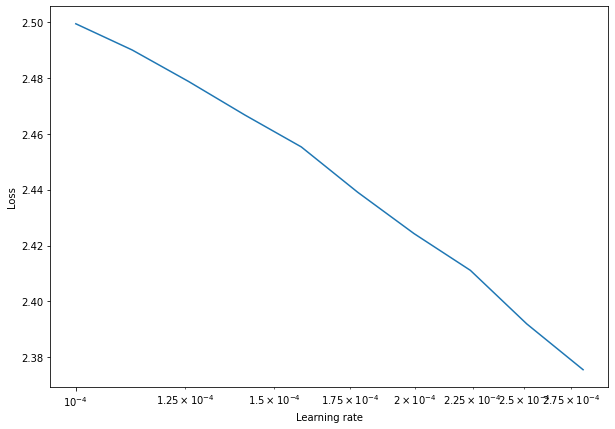

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10,7))
loss = history_3.history["loss"]
plt.semilogx(lrs, loss)
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [ ]:
2.75 * 10e-4

0.00275

Looks like the loss is at it'slowest in `0.00275`. let's train the model for more epochs in this learning rate.

### Callbacks

In [ ]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

checkpoint_path = "/content/drive/MyDrive/ML_models/asl/eal_lr"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor="accuracy",
                                                         save_best_only=True,
                                                         save_weights_only=True)

### 1. Model with 20 percent training data

In [ ]:
# Building the model
inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = preprocessing.Rescaling(1/255., name="scale_layer")(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pool_layer")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_1_ideal_lr = Model(inputs, outputs)

# COmpile the model
model_1_ideal_lr.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.00275),
              metrics=["accuracy"])

# Fit the model
history_4 = model_1_ideal_lr.fit(train_data_20_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_20_percent),
                      validation_data=val_data,
                      validation_steps=int(0.10 * len(val_data)),
                      callbacks=[early_stopping, checkpoint_callback])

Epoch 1/5
381/381 [==============================] - 74s 180ms/step - loss: 3.3615 - accuracy: 0.0706 - val_loss: 2.9846 - val_accuracy: 0.1725
Epoch 2/5
381/381 [==============================] - 68s 175ms/step - loss: 3.0065 - accuracy: 0.1630 - val_loss: 2.8277 - val_accuracy: 0.1875
Epoch 3/5
381/381 [==============================] - 68s 175ms/step - loss: 2.8307 - accuracy: 0.2014 - val_loss: 2.7509 - val_accuracy: 0.2292
Epoch 4/5
381/381 [==============================] - 68s 175ms/step - loss: 2.7027 - accuracy: 0.2329 - val_loss: 2.6164 - val_accuracy: 0.2720
Epoch 5/5
381/381 [==============================] - 68s 175ms/step - loss: 2.6209 - accuracy: 0.2589 - val_loss: 2.5413 - val_accuracy: 0.2894
time: 5min 51s (started: 2021-05-15 05:46:36 +00:00)


Allright, the model's not learning faster even with our ideal learning it. Let's crank it up a notch and train the model with 40% data.

In [ ]:
# Getting 40 percent data
train_40_percent_size = int(train_size * 0.4)
train_40_percent_size

train_40_percent_ds = train_ds.take(train_40_percent_size)

# Load in the data
train_data_40_percent = train_40_percent_ds.map(map_func=process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle, batch and prefetch
train_data_40_percent = train_data_40_percent.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Now we've 40percent data let's train a new model.

### 2. Model with 40 percent training data

Whilemixed precsion was on

In [ ]:
# # Defining Input shape
# INPUT_SHAPE = (224, 224, 3)

# # Building the model
# inputs = layers.Input(shape=INPUT_SHAPE, name="input_layer")
# x = preprocessing.Rescaling(scale=1/255., name="scale_layer")(inputs)
# x = base_model(x, training=False)
# x = layers.GlobalAveragePooling2D(name="pooling-layer")(x)
# outputs = layers.Dense(29, activation="softmax", name="output_layer")(x)
# model_2 = tf.keras.Model(inputs, outputs)

# # Compile the model
# model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(lr=0.00275),
#                 metrics=["accuracy"])

# # Fit the model
# history_2_with_ideal_lr = model_2.fit(train_data_40_percent,
#                                       epochs=5,
#                                       steps_per_epoch=len(train_data_40_percent),
#                                       validation_data=val_data,
#                                       validation_steps=int(0.10 * len(val_data)),
#                                       callbacks=[early_stopping])

Epoch 1/5
762/762 [==============================] - 136s 171ms/step - loss: 3.2593 - accuracy: 0.0971 - val_loss: 2.8060 - val_accuracy: 0.2234
Epoch 2/5
762/762 [==============================] - 130s 169ms/step - loss: 2.8017 - accuracy: 0.2165 - val_loss: 2.6070 - val_accuracy: 0.2766
Epoch 3/5
762/762 [==============================] - 129s 168ms/step - loss: 2.6062 - accuracy: 0.2675 - val_loss: 2.4487 - val_accuracy: 0.2998
Epoch 4/5
762/762 [==============================] - 129s 169ms/step - loss: 2.4565 - accuracy: 0.3050 - val_loss: 2.3514 - val_accuracy: 0.3356
Epoch 5/5
762/762 [==============================] - 130s 169ms/step - loss: 2.3525 - accuracy: 0.3303 - val_loss: 2.3768 - val_accuracy: 0.3090
time: 10min 55s (started: 2021-05-15 06:56:35 +00:00)


In [ ]:
# Defining Input shape
INPUT_SHAPE = (224, 224, 3)

# Building the model
inputs = layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = preprocessing.Rescaling(scale=1/255., name="scale_layer")(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="pooling-layer")(x)
outputs = layers.Dense(29, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.00275),
                metrics=["accuracy"])

# Fit the model
history_2_with_ideal_lr = model_2.fit(train_data_40_percent,
                                      epochs=5,
                                      steps_per_epoch=len(train_data_40_percent),
                                      validation_data=val_data,
                                      validation_steps=int(0.10 * len(val_data)),
                                      callbacks=[early_stopping])

Epoch 1/5
762/762 [==============================] - 298s 380ms/step - loss: 3.2396 - accuracy: 0.1008 - val_loss: 2.9334 - val_accuracy: 0.1910
Epoch 2/5
762/762 [==============================] - 288s 377ms/step - loss: 2.7927 - accuracy: 0.2196 - val_loss: 2.6167 - val_accuracy: 0.2546
Epoch 3/5
762/762 [==============================] - 289s 377ms/step - loss: 2.5871 - accuracy: 0.2720 - val_loss: 2.4606 - val_accuracy: 0.3102
Epoch 4/5
762/762 [==============================] - 288s 377ms/step - loss: 2.4484 - accuracy: 0.3049 - val_loss: 2.4276 - val_accuracy: 0.3056
Epoch 5/5
762/762 [==============================] - 288s 377ms/step - loss: 2.3399 - accuracy: 0.3344 - val_loss: 2.3183 - val_accuracy: 0.3530


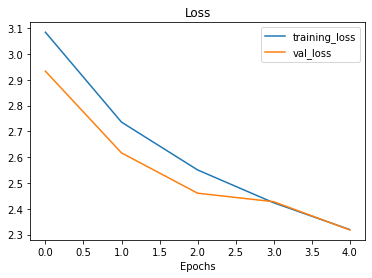

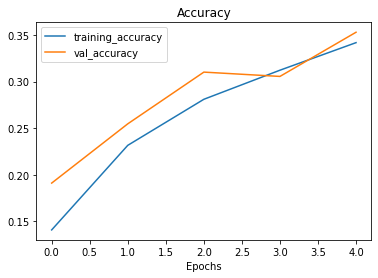

In [ ]:
from dl_helper import plot_loss_curves,compare_historys
plot_loss_curves(history_2_with_ideal_lr)

The model'sdoing really good, let's train it for 15 more epochs.

### 3. Model 2 with 40 percent training data for 10 more epochs

In [ ]:
history_3_with_ideal_lr = model_2.fit(train_data_40_percent,
                                      epochs=15,
                                      initial_epoch=history_2_with_ideal_lr.epoch[-1],
                                      steps_per_epoch=len(train_data_40_percent),
                                      validation_data=val_data,
                                      validation_steps=len(val_data),
                                      callbacks=[early_stopping])

Epoch 5/15
762/762 [==============================] - 377s 494ms/step - loss: 2.2328 - accuracy: 0.3685 - val_loss: 2.2040 - val_accuracy: 0.3651
Epoch 6/15
762/762 [==============================] - 376s 493ms/step - loss: 2.1655 - accuracy: 0.3869 - val_loss: 2.1819 - val_accuracy: 0.3694
Epoch 7/15
762/762 [==============================] - 376s 493ms/step - loss: 2.1025 - accuracy: 0.4078 - val_loss: 2.1001 - val_accuracy: 0.4014
Epoch 8/15
762/762 [==============================] - 377s 493ms/step - loss: 2.0512 - accuracy: 0.4218 - val_loss: 2.0602 - val_accuracy: 0.3969
Epoch 9/15
762/762 [==============================] - 376s 492ms/step - loss: 1.9992 - accuracy: 0.4338 - val_loss: 1.9575 - val_accuracy: 0.4690
Epoch 10/15
762/762 [==============================] - 376s 492ms/step - loss: 1.9537 - accuracy: 0.4508 - val_loss: 2.0197 - val_accuracy: 0.4045


In [ ]:
from dl_helper import save_model
# Saving our current best model
save_model(model=model_2,
           model_name="model_10_layers_fine_tuned",
           target_dir="/content/drive/MyDrive/ML_models/asl/01_full_fine_tune_without_mixed_precision")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_models/asl/01_full_fine_tune_without_mixed_precision/model_10_layers_fine_tuned/assets


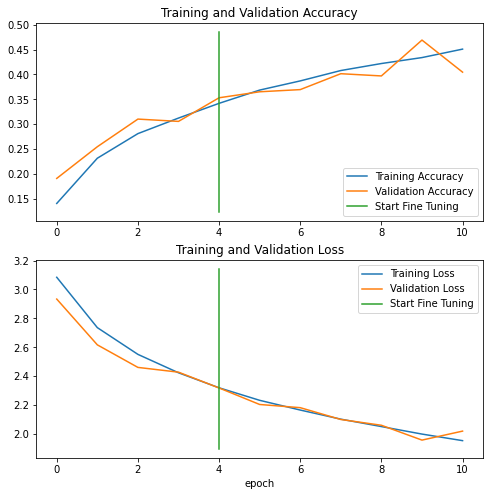

In [ ]:
compare_historys(original_history=history_2_with_ideal_lr,
                 new_history=history_3_with_ideal_lr,
                 initial_epochs=5)

The model's improving, let's fine tune the model by refreezing 10 layers.

### 4. Model with Fine Tuning(10 layers)

In [ ]:
base_model.trainable = True
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 conv1_pad True
2 conv1_conv True
3 conv1_bn True
4 conv1_relu True
5 pool1_pad True
6 pool1_pool True
7 conv2_block1_1_conv True
8 conv2_block1_1_bn True
9 conv2_block1_1_relu True
10 conv2_block1_2_conv True
11 conv2_block1_2_bn True
12 conv2_block1_2_relu True
13 conv2_block1_0_conv True
14 conv2_block1_3_conv True
15 conv2_block1_0_bn True
16 conv2_block1_3_bn True
17 conv2_block1_add True
18 conv2_block1_out True
19 conv2_block2_1_conv True
20 conv2_block2_1_bn True
21 conv2_block2_1_relu True
22 conv2_block2_2_conv True
23 conv2_block2_2_bn True
24 conv2_block2_2_relu True
25 conv2_block2_3_conv True
26 conv2_block2_3_bn True
27 conv2_block2_add True
28 conv2_block2_out True
29 conv2_block3_1_conv True
30 conv2_block3_1_bn True
31 conv2_block3_1_relu True
32 conv2_block3_2_conv True
33 conv2_block3_2_bn True
34 conv2_block3_2_relu True
35 conv2_block3_3_conv True
36 conv2_block3_3_bn True
37 conv2_block3_add True
38 conv2_block3_out True
39 conv3_block1_1_conv Tru

In [ ]:
# Refreezing all the layers except top 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

time: 19.6 ms (started: 2021-05-15 08:51:51 +00:00)


In [ ]:
# Layers are refreezed, check them out
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

Okay, top10 layers of base_model is unfrozen.

let's recompile the model and fit it.

In [ ]:
# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.00275),
                metrics=["accuracy"])

# Fit the model
history_3_with_ideal_lr_fine_tune = model_2.fit(train_data_40_percent,
                                                epochs=10,
                                                steps_per_epoch=len(train_data_40_percent),
                                                validation_data=val_data,
                                                validation_steps=len(val_data),
                                                callbacks=[early_stopping])

Epoch 1/10
762/762 [==============================] - 176s 223ms/step - loss: 4461209201335149.5000 - accuracy: 0.0354 - val_loss: 611392822444032.0000 - val_accuracy: 0.0329
Epoch 2/10
762/762 [==============================] - 173s 226ms/step - loss: 765859563748839.1250 - accuracy: 0.0359 - val_loss: 789997493944320.0000 - val_accuracy: 0.0349
Epoch 3/10
762/762 [==============================] - 174s 227ms/step - loss: 697136611776359.0000 - accuracy: 0.0352 - val_loss: 680545956659200.0000 - val_accuracy: 0.0340
time: 8min 43s (started: 2021-05-15 08:51:56 +00:00)


That's great, fine tuned model is doing better than guessing, leet's check it how it goes on test data.

In [ ]:
# Evaluating the model
model_2.evaluate(test_data)

544/544 [==============================] - 88s 160ms/step - loss: 688012153323520.0000 - accuracy: 0.0341


[688012153323520.0, 0.03408046066761017]

time: 1min 28s (started: 2021-05-15 09:00:41 +00:00)


Awesome,the model's performing as expected, Let's unfeerze all layers and train them on full dataset(3000 per class). Before that let's create some callbacks for this big experiment.

### Callbacks for full fine tune model

In [ ]:
checkpoint_path_full_fine_tune = "/content/drive/MyDrive/ML_checkpoints/asl/01_full_fine_tune"
checkpoint_callback_full_fine_tune = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_full_fine_tune,
                                                                        monitor='val_loss',
                                                                        save_best_only=True,
                                                                        save_weights_only=True)

rl_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                   factor=0.2,
                                                   patience=2,
                                                   min_lr=0)

time: 3.38 ms (started: 2021-05-15 07:59:49 +00:00)


In [ ]:
# Unfreezing all layers in base model
base_model.trainable = True
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_1 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_block1

Okay, all layers are trainable. Now let' set up mixed precision to reduce our training time.

In [ ]:
tf.keras.mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5
time: 9.21 ms (started: 2021-05-15 08:01:42 +00:00)


Ookay `mixed_precision` setup is completed, next we've to seperat our dense and activation layer,because the numerocal stability of activation layer becomes worse on `float_16`.

### 5. Model with full data and trainable base model

In [ ]:
# Building the model
inputs = layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = preprocessing.Rescaling(1/255., name="preprocessing_layer")(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="gloabal_average_pooling_layer")(x)
x = layers.Dense(29, name="dense_layer")(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name="activation_layer")(x)
model_3_full_fine_tuned = tf.keras.Model(inputs, outputs)

# Compile the model
model_3_full_fine_tuned.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                optimizer=tf.keras.optimizers.Adam(lr=1e-6),
                                metrics=["accuracy"])

time: 728 ms (started: 2021-05-15 08:38:56 +00:00)


Before fitting te mode, let's checkout the model precision policy to validata `mixed_precision`.

In [ ]:
for layer in model_3_full_fine_tuned.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
preprocessing_layer True float32 <Policy "mixed_float16">
resnet101 True float32 <Policy "float32">
gloabal_average_pooling_layer True float32 <Policy "mixed_float16">
dense_layer True float32 <Policy "mixed_float16">
activation_layer True float32 <Policy "float32">
time: 3.14 ms (started: 2021-05-15 08:12:12 +00:00)


Okay,`mixed_float16` is used wherver's possible. Let's fit the model.

In [ ]:
# Getting tensorboard callback
from dl_helper import create_tensorboard_callback

time: 709 µs (started: 2021-05-15 08:22:05 +00:00)


In [ ]:
# Fitting the model
history_4_full_fine_tune =                                           model_3_full_fine_tuned.fit(train_data,
                                                                     epochs=10,
                                                                     steps_per_epoch=len(train_data),
                                                                     validation_data=val_data,
                                                                     validation_steps=len(val_data),
                                                                     callbacks=[early_stopping,
                                                                                rl_callback,
                                                                                checkpoint_callback_full_fine_tune,
                                                                                create_tensorboard_callback(dir_name="/content/drive/MyDrive/ML_logs/asl",
                                                                                                            experiment_name="01_full_fine_tune")])

Saving TensorBoard log files to: /content/drive/MyDrive/ML_logs/asl/01_full_fine_tune/20210515-083901
Epoch 1/10
   9/1904 [..............................] - ETA: 24:07 - loss: nan - accuracy: 0.0085

KeyboardInterrupt: ignored

time: 24.3 s (started: 2021-05-15 08:39:01 +00:00)


Okay, unfreezing all layers's leads to `nan loss` even with lr as low as `1e-6`. Let's go the previous experiment, instead of unfreezing all layer, we'll unreeze 10more layers (i.e) 20 and check out the model's performance and if it leads to na  loss.

In [ ]:
# Saving our current best model
save_model(model=model_2,
           model_name="model_10_layers_fine_tuned",
           target_dir="/content/drive/MyDrive/ML_models/asl/01_full_fine_tune")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_models/asl/01_full_fine_tune/model_10_layers_fine_tuned/assets
time: 45.7 s (started: 2021-05-15 09:02:10 +00:00)


In [ ]:
# Load the model
loaded_model_10_layers_fine_tune = tf.keras.models.load_model("//content/drive/MyDrive/ML_models/asl/01_full_fine_tune/model_10_layers_fine_tuned")

time: 20.5 s (started: 2021-05-15 09:02:55 +00:00)


In [ ]:
# Evaluate loaded model
loaded_model_10_layers_fine_tune.evaluate(test_data)

 29/544 [>.............................] - ETA: 1:21 - loss: 687393879359488.0000 - accuracy: 0.0334

In the above cells the model was saved after running `mixed_precision` but the modelwas trained without `mixed_precision`.  Due to `numerical_stability` the model performed worse than before. This is because the model had dense and activation in the same layer.

So we're gonna retrain the previous cells, save the model and evaluate the model with applying `mixed_precsion`.

**Note**: In this guide, the term "numeric stability" refers to how a model's quality is affected by the use of a lower-precision dtype instead of a higher precision dtype. We say an operation is "numerically unstable" in float16 or bfloat16 if running it in one of those dtypes causes the model to have worse evaluation accuracy or other metrics compared to running the operation in float32.

In [ ]:
# Load and evaluate
loaded_model_40_per_without_mp = tf.keras.models.load_model("/content/drive/MyDrive/ML_models/asl/01_full_fine_tune_without_mixed_precision/model_10_layers_fine_tuned")

In [ ]:
# Checkout the model
for layer in loaded_model_40_per_without_mp.layers:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_layer float32 <Policy "float32">
scale_layer float32 <Policy "float32">
resnet101 float32 <Policy "float32">
pooling-layer float32 <Policy "float32">
output_layer float32 <Policy "float32">


Okay the mode doesn't have `mixed_precision` let's evaluate.

In [ ]:
# Evaluate the model
loaded_model_40_per_without_mp.evaluate(test_data)

544/544 [==============================] - 203s 366ms/step - loss: 2.0072 - accuracy: 0.4038


[2.0071756839752197, 0.4037930965423584]

okay the loaded model is performing a s expected. Since fully unfreezed base model is too complex leading to `nan` loss. Let's do the below,

1. Unfreeze top 30 layers
2. Increase training data by 60 percent

### Preparing 60% data


In [ ]:
# Getting 60 percent count
train_60_percent_size = int(train_size * 0.6)
train_60_percent_size

# Getting 60 percent data
train_60_percent_ds = train_ds.take(train_60_percent_size)

# Preprocessing the data
tf.random.set_seed(42)
train_data_60_percent = train_60_percent_ds.map(map_func=process_path, num_parallel_calls=tf.data.AUTOTUNE)
train_data_60_percent = train_data_60_percent.shuffle(buffer_size=1000, seed=42).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

### 6. Model 6 Fine tune(30 layers) 60 percent data

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 input_1 False float32 <Policy "float32">
1 conv1_pad False float32 <Policy "float32">
2 conv1_conv False float32 <Policy "float32">
3 conv1_bn False float32 <Policy "float32">
4 conv1_relu False float32 <Policy "float32">
5 pool1_pad False float32 <Policy "float32">
6 pool1_pool False float32 <Policy "float32">
7 conv2_block1_1_conv False float32 <Policy "float32">
8 conv2_block1_1_bn False float32 <Policy "float32">
9 conv2_block1_1_relu False float32 <Policy "float32">
10 conv2_block1_2_conv False float32 <Policy "float32">
11 conv2_block1_2_bn False float32 <Policy "float32">
12 conv2_block1_2_relu False float32 <Policy "float32">
13 conv2_block1_0_conv False float32 <Policy "float32">
14 conv2_block1_3_conv False float32 <Policy "float32">
15 conv2_block1_0_bn False float32 <Policy "float32">
16 conv2_block1_3_bn False float32 <Policy "float32">
17 conv2_block1_add False float32 <Policy "float32">
18 conv2_block1_out False float32 <Policy "float32">
19 conv2_block2_1_conv False f

Now the base model with 30 layers unfreezed are ready. let's build, compile and fit the model.

In [ ]:
checkpoint_path_30l_60per_fine_tune = "/content/drive/MyDrive/ML_checkpoints/asl/02_30l_fine_tune_60per"
checkpoint_callback_30l_60per_fine_tune = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_30l_60per_fine_tune,
                                                                        monitor='val_loss',
                                                                        save_best_only=True,
                                                                        save_weights_only=True)

rl_callback_30l_60per = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                   factor=0.2,
                                                   patience=2,
                                                   min_lr=0)

In [ ]:
# Build the mode
inputs = layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = preprocessing.Rescaling(1/255., name="scale_layer")(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="gap_layer")(x)
x = layers.Dense(29, name="dense_layer")(x)
outputs = layers.Activation(activation="softmax", name="activation_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

# Fit the model
history_4_30l_60per = model_3.fit(train_data_60_percent,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_60_percent),
                                  validation_data=val_data,
                                  validation_steps=len(val_data),
                                  callbacks=[early_stopping,
                                             checkpoint_callback_30l_60per_fine_tune,
                                             rl_callback_30l_60per])

Epoch 1/10
1142/1142 [==============================] - 599s 517ms/step - loss: 2.9848 - accuracy: 0.1337 - val_loss: 1.6557 - val_accuracy: 0.4622
Epoch 2/10
1142/1142 [==============================] - 588s 514ms/step - loss: 1.3829 - accuracy: 0.5501 - val_loss: 0.7617 - val_accuracy: 0.7418
Epoch 3/10
1142/1142 [==============================] - 589s 515ms/step - loss: 0.7172 - accuracy: 0.7561 - val_loss: 0.4893 - val_accuracy: 0.8422
Epoch 4/10
1142/1142 [==============================] - 588s 514ms/step - loss: 0.4587 - accuracy: 0.8427 - val_loss: 0.4249 - val_accuracy: 0.8545
Epoch 5/10
1142/1142 [==============================] - 589s 514ms/step - loss: 0.3424 - accuracy: 0.8821 - val_loss: 0.2171 - val_accuracy: 0.9248
Epoch 6/10
1142/1142 [==============================] - 589s 515ms/step - loss: 0.2500 - accuracy: 0.9117 - val_loss: 0.1988 - val_accuracy: 0.9352
Epoch 7/10
1142/1142 [==============================] - 590s 516ms/step - loss: 0.2192 - accuracy: 0.9247 - val_

Awesome, the model performance is great we've beaten the 90% accuracy mark set at the beginning of this notebook. Let's save the model.

In [ ]:
save_model(model=model_3,
           model_name="02_fine_tune_30l_60per",
           target_dir="/content/drive/MyDrive/ML_models/asl")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML_models/asl/02_fine_tune_30l_60per/assets


In [ ]:
# Evaluate the model on test data
model_3.evaluate(test_data)

544/544 [==============================] - 199s 363ms/step - loss: 0.2100 - accuracy: 0.9293


[0.21000094711780548, 0.9292528629302979]

The model isperforming as good as in `val_data` like `test_data`.

### Load Saved model

In [ ]:
# Load the saved model and evaluateit
loaded_model_30l_60per = tf.keras.models.load_model("/content/drive/MyDrive/ML_models/asl/02_fine_tune_30l_60per")
# loaded_model_30l_60per.evaluate(test_data)

In [ ]:
loaded_model_30l_60per.evaluate(test_data)

544/544 [==============================] - 125s 167ms/step - loss: 0.1769 - accuracy: 0.9414


[0.1768961250782013, 0.941436767578125]

### Evaluation

The loaded model is working as expected,let's do the below evaluations. Coz metrics might decieve us.

1. Confusion matrix
2. plot and predict
3. How wrong is our model predicting
4. Barh of f1-scores
5. Classification report

### 1. Confusion Matrix

In [ ]:
from dl_helper import make_confusion_matrix

In [ ]:
# Make predictons
pred_probs = loaded_model_30l_60per.predict(test_data)
pred_probs[:1]

array([[6.3370743e-07, 7.6687382e-07, 1.5241843e-08, 1.7617771e-07,
        1.6143381e-06, 9.0139183e-06, 4.6901192e-08, 7.6259573e-07,
        5.3627709e-06, 3.3766770e-05, 1.9290543e-05, 2.2654895e-05,
        5.8448699e-04, 3.8038168e-02, 4.8386175e-02, 3.0386656e-07,
        2.9184307e-06, 2.4064857e-06, 1.3655440e-03, 7.9326123e-02,
        3.5698032e-03, 3.2296251e-03, 4.0871766e-03, 5.6766532e-03,
        7.5255138e-01, 3.7513287e-03, 6.8930145e-03, 2.0728719e-09,
        5.2440815e-02]], dtype=float32)

In [ ]:
pred_probs.shape

(17400, 29)

In [ ]:
# Getting the predicions
preds = tf.argmax(pred_probs, axis=1)
preds.shape, preds[:2]

(TensorShape([17400]),
 <tf.Tensor: shape=(2,), dtype=int64, numpy=array([24,  6])>)

In [ ]:
# Getting pred_classes
pred_class = []
for i in preds:
  pred_class.append(class_names[i])

In [ ]:
pred_class[:2]

['Y', 'G']

In [ ]:
pred_class[:2], class_names[2], class_names[21] 

(['Y', 'G'], 'C', 'V')

In [ ]:
# Getting truth labels
truth_one_hot = []
for image, label in test_data.unbatch():
  truth_one_hot.append(label)

In [ ]:
truth_label = tf.argmax(truth_one_hot, axis=1)

In [ ]:
# Getting truth class
truth_class = []
for i in truth_label:
  truth_class.append(class_names[i])

In [ ]:
truth_class[:2]

['space', 'G']

Now the prediciotns and truht labels are ready.

In [ ]:
truth_label = list(truth_label)
preds = list(preds)

In [ ]:
type(truth_label),type(preds)

(list, list)

In [ ]:
pred_class[:2], truth_class[:2]

(['Y', 'G'], ['space', 'G'])

In [ ]:
# Converting ndarray to list to use in conf matrix
class_names = list(class_names)

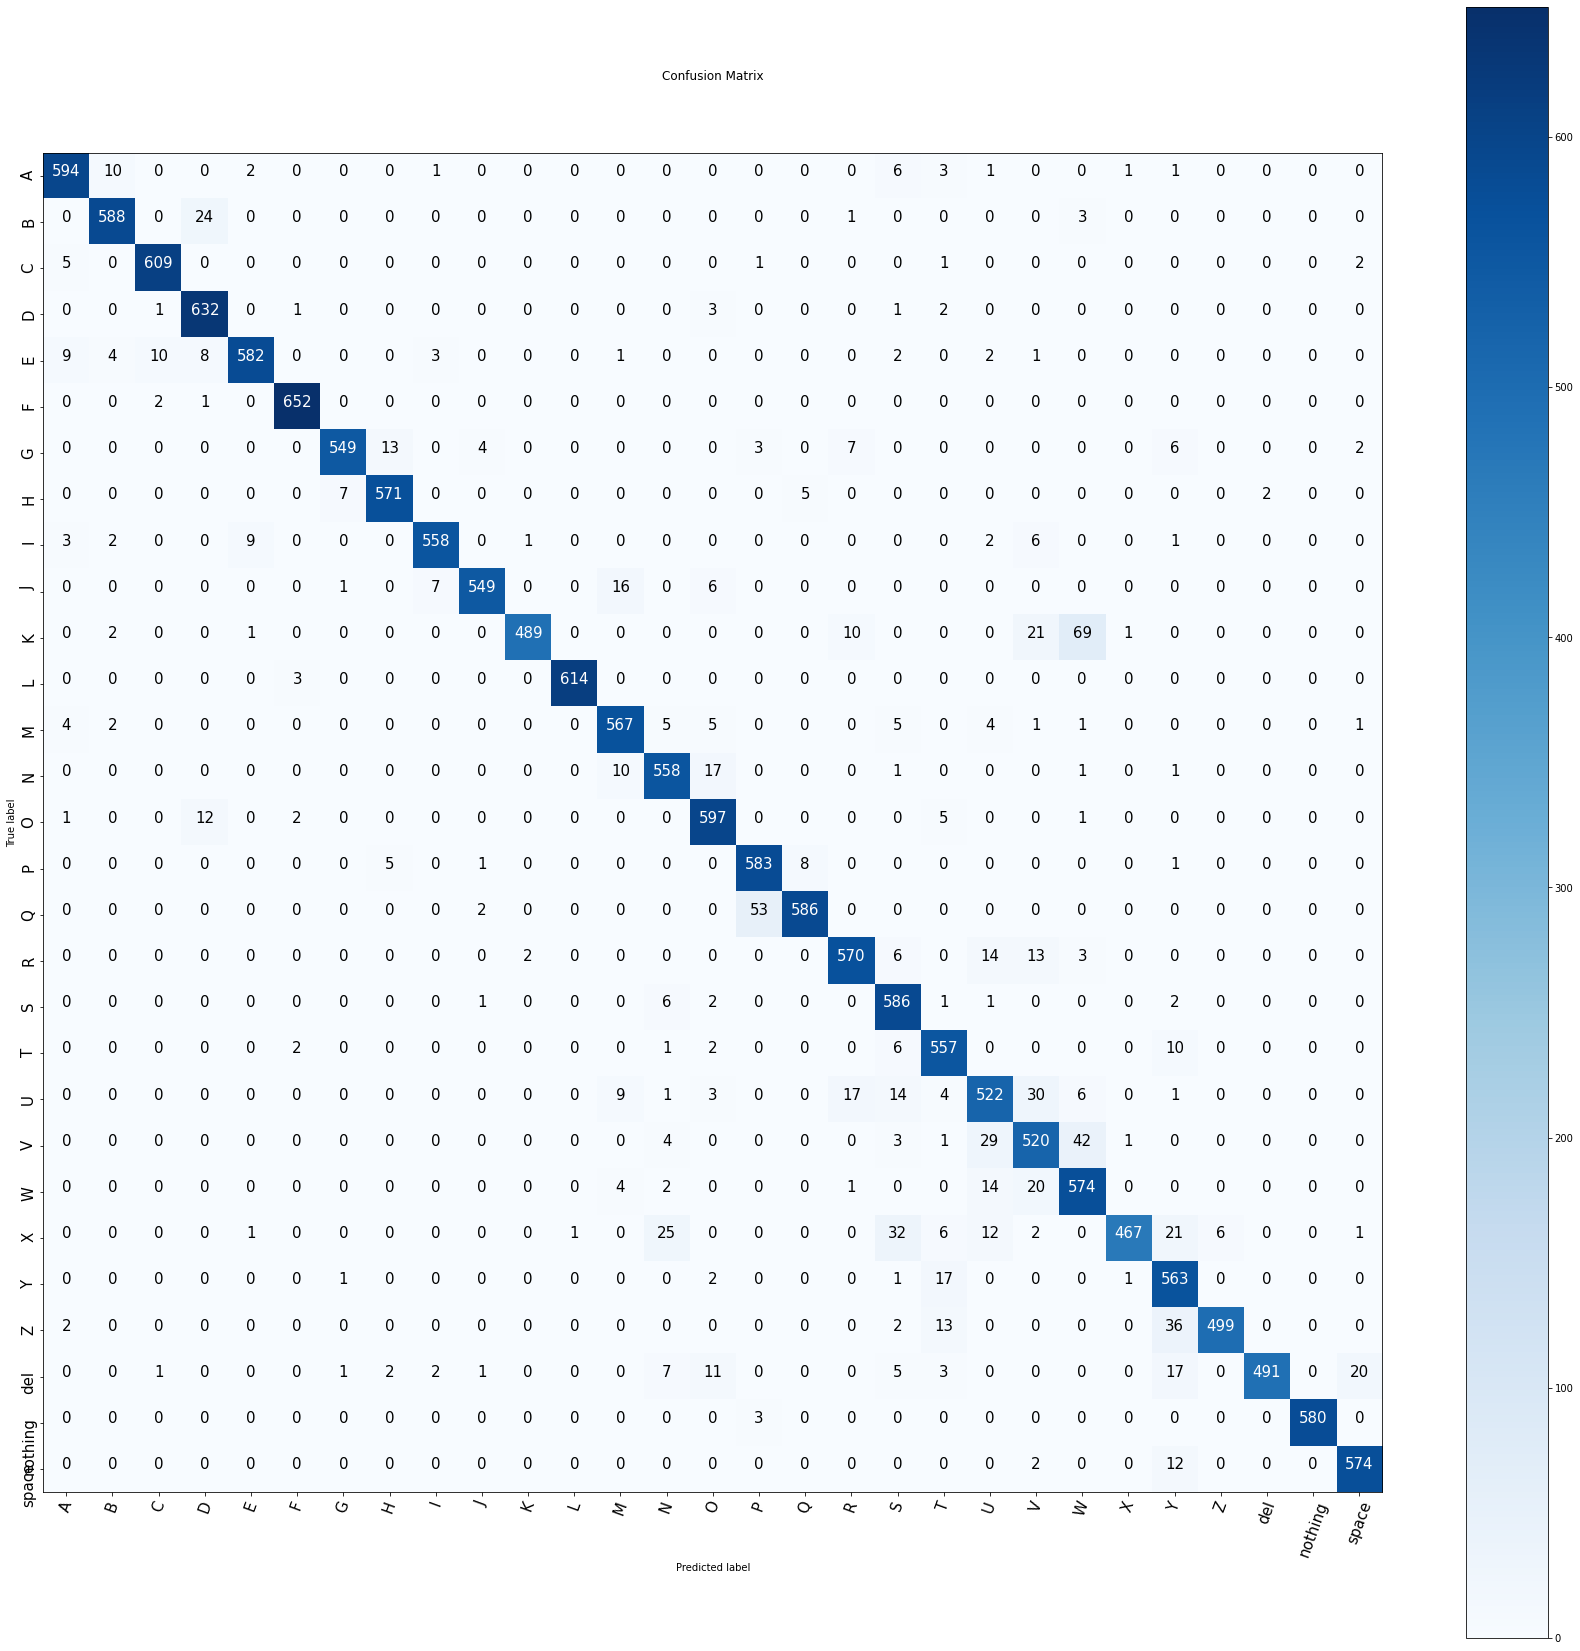

In [ ]:
make_confusion_matrix(y_true=truth_label,
                      y_pred=preds,
                      figsize=(30,30),
                      classes=class_names)

Great, theconfusion matrix is dark along the diagnoal, meaning the model is performing well.

### 2. Plot and predict

In [ ]:
from dl_helper import pred_and_plot_multiple

In [ ]:
test_dir = Path("/content/asl_alphabet_test/asl_alphabet_test")

In [ ]:
test_ls = [i for i in test_dir.glob('*')]
test_ls[:2]

[PosixPath('/content/asl_alphabet_test/asl_alphabet_test/D_test.jpg'),
 PosixPath('/content/asl_alphabet_test/asl_alphabet_test/M_test.jpg')]

In [ ]:
def load_and_prep_image(filepath, image_size=224):

  """
  Function loads and prepare the image for prediction provided a filepath and image_size
  Args:
  filepath: Path to the image
  image_size: Reshapes the image to (imgage_size,image_size)
  Prerequisites:
  tensorflow as tf
  Return:
  Reshaped image with expanded dims
  """

  # Load in the image and resize it to (img_size, img_size)
  loaded_image = tf.keras.preprocessing.image.load_img(filepath, target_size=(image_size, image_size))

  # Convert the image to array
  img_array = tf.keras.preprocessing.image.img_to_array(loaded_image)

  # Adding dimension to accomodate batch size
  img = tf.expand_dims(img_array, axis=0)

  return img, filepath

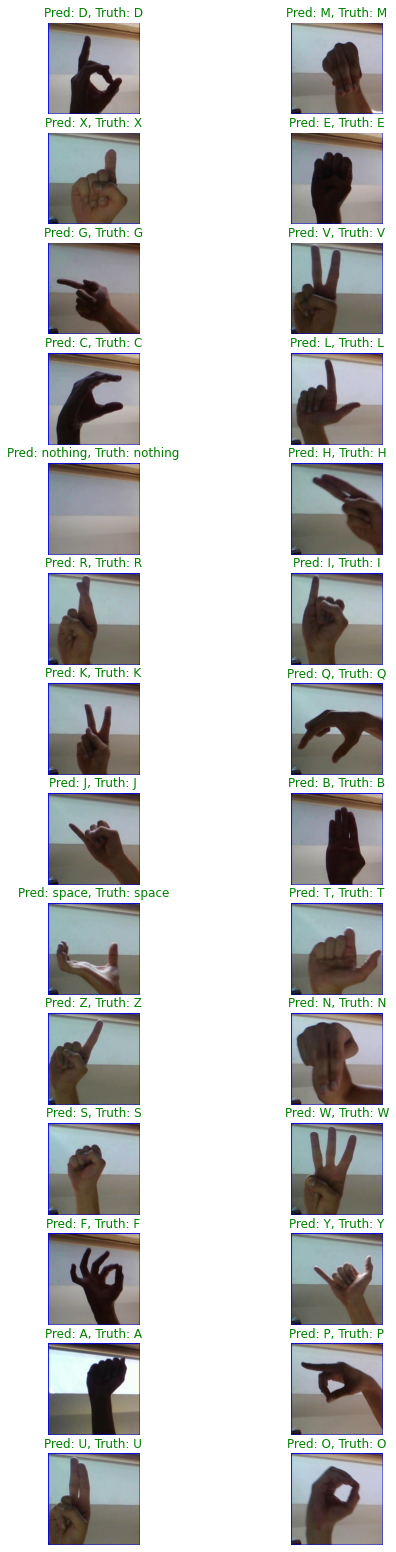

In [ ]:
import matplotlib.pyplot as plt

num_rows = 14
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):

  # Load and prep the image
  img, filepath = load_and_prep_image(filepath=test_ls[i])

  # Make predictions
  pred_prob = loaded_model_30l_60per.predict(img)
  predicted_class = class_names[np.argmax(pred_prob)]
  # Get class
  # pred_class = class_names[np.argmax(pred_probs,axis=1)]

  # Truth class
  truth_class = filepath.parts[-1].split('_')[0]

  if truth_class == predicted_class:
    c = "g"
  else:
    c ="r"
  plt.subplot(num_rows,num_cols, i+1)
  plt.imshow(plt.imread(filepath))
  plt.axis(False)
  plt.title(f"Pred: {pred_class}, Truth: {truth_class}", color=c)

Aweomse,the model has predicted all images perfectly in unseend data.

### How wrong is our model predicting?

Let's create a  pd dataframe using test_set filepath, truth label, pred label.

In [ ]:
y_true = np.argmax(truth_one_hot, axis=1)
y_preds = np.argmax(pred_probs,axis=1)

In [ ]:
test_ds_paths = []
for i in test_ds.as_numpy_iterator():
  test_ds_paths.append(i)

In [ ]:
test_ds_paths[:2]

[b'/content/asl_alphabet_train/asl_alphabet_train/space/space1289.jpg',
 b'/content/asl_alphabet_train/asl_alphabet_train/G/G1801.jpg']

In [ ]:
import pandas as pd
df = pd.DataFrame({"file": test_ds_paths,
                   "y_true": y_true,
                   "y_pred": y_preds,
                   "prob": pred_probs.max(axis=1),
                   "truth": truth_class,
                   "pred": pred_class})

In [ ]:
df.head()

,file,y_true,y_pred,prob,truth,pred
0,b'/content/asl_alphabet_train/asl_alphabet_tra...,28,24,0.752551,space,Y
1,b'/content/asl_alphabet_train/asl_alphabet_tra...,6,6,0.990421,G,G
2,b'/content/asl_alphabet_train/asl_alphabet_tra...,12,12,0.998277,M,M
3,b'/content/asl_alphabet_train/asl_alphabet_tra...,16,16,0.999566,Q,Q
4,b'/content/asl_alphabet_train/asl_alphabet_tra...,15,15,0.999270,P,P


In [ ]:
df["pred_correct"] = df["y_true"] == df["y_pred"]

In [ ]:
df.head()

,file,y_true,y_pred,prob,truth,pred,pred_correct
0,b'/content/asl_alphabet_train/asl_alphabet_tra...,28,24,0.752551,space,Y,False
1,b'/content/asl_alphabet_train/asl_alphabet_tra...,6,6,0.990421,G,G,True
2,b'/content/asl_alphabet_train/asl_alphabet_tra...,12,12,0.998277,M,M,True
3,b'/content/asl_alphabet_train/asl_alphabet_tra...,16,16,0.999566,Q,Q,True
4,b'/content/asl_alphabet_train/asl_alphabet_tra...,15,15,0.999270,P,P,True


In [ ]:
top_100_wrong = df[df["pred_correct"] == False].sort_values("prob", ascending=False)[:100]
top_100_wrong.head(20)

,file,y_true,y_pred,prob,truth,pred,pred_correct
15936,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,1.000000,B,D,False
5773,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,1.000000,B,D,False
7416,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999992,B,D,False
10607,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999984,B,D,False
12059,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999982,B,D,False
10209,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999977,B,D,False
13623,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999931,B,D,False
13930,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999915,B,D,False
712,b'/content/asl_alphabet_train/asl_alphabet_tra...,6,7,0.999898,G,H,False
11496,b'/content/asl_alphabet_train/asl_alphabet_tra...,1,3,0.999821,B,D,False


In [ ]:
top_100_wrong.file = top_100_wrong.file.astype('|S')

In [ ]:
top_100_wrong["file"] = top_100_wrong["file"].str.decode('utf-8')

In [ ]:
top_100_wrong.dtypes

file             object
y_true            int64
y_pred            int64
prob            float32
truth            object
pred             object
pred_correct       bool
dtype: object

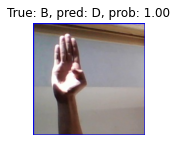

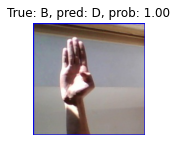

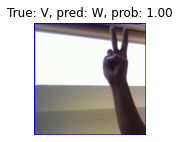

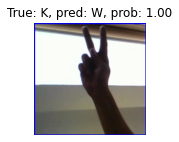

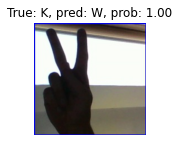

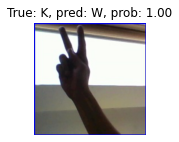

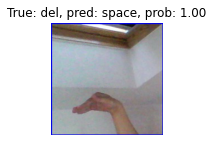

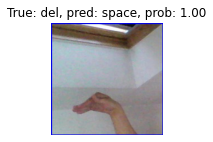

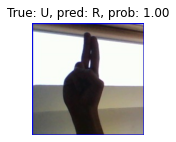

In [ ]:
start_index=10 # Change the start index to view more
images_to_view=9 
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.figure(figsize=(10,7))
  plt.subplot(3, 3,i+1)
  plt.imshow(plt.imread(Path(row.file)))
  true_label = row.truth
  pred_label = row.pred
  prob = row.prob

  plt.title(f"True: {true_label}, pred: {pred_label}, prob: {prob:.2f}")
  plt.axis(False)

In [ ]:
top_100_wrong_count = top_100_wrong.groupby(by=['y_true','y_pred'])['file'].count()

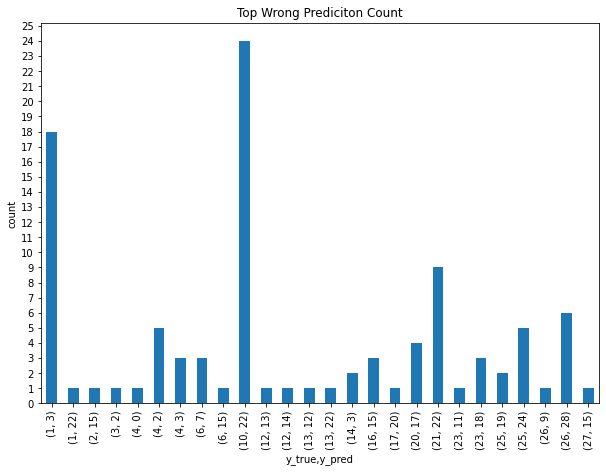

In [ ]:
plt.figure(figsize=(10,7))
top_100_wrong_count.plot(kind='bar')
plt.xlabel("y_true,y_pred")
plt.ylabel("count")
plt.yticks(np.arange(26))
plt.title("Top Wrong Prediciton Count");

In [ ]:
class_names[1], class_names[3],class_names[10],class_names[22]

('B', 'D', 'K', 'W')

### Classification report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_true,y_preds,output_dict=True)
cr

{'0': {'f1-score': 0.9603880355699272,
  'precision': 0.9611650485436893,
  'recall': 0.9596122778675282,
  'support': 619},
 '1': {'f1-score': 0.9607843137254902,
  'precision': 0.9671052631578947,
  'recall': 0.9545454545454546,
  'support': 616},
 '10': {'f1-score': 0.9013824884792627,
  'precision': 0.9939024390243902,
  'recall': 0.8246205733558178,
  'support': 593},
 '11': {'f1-score': 0.9967532467532467,
  'precision': 0.9983739837398374,
  'recall': 0.9951377633711507,
  'support': 617},
 '12': {'f1-score': 0.9434276206322795,
  'precision': 0.9341021416803954,
  'recall': 0.9529411764705882,
  'support': 595},
 '13': {'f1-score': 0.9323308270676692,
  'precision': 0.916256157635468,
  'recall': 0.9489795918367347,
  'support': 588},
 '14': {'f1-score': 0.943127962085308,
  'precision': 0.9212962962962963,
  'recall': 0.9660194174757282,
  'support': 618},
 '15': {'f1-score': 0.9395648670427076,
  'precision': 0.9066874027993779,
  'recall': 0.9749163879598662,
  'support': 59

In [ ]:
class_names_from_cr = []
f1_scores = []
for i, k in cr.items():
  if i == 'accuracy':
    break
  # print(i)
  class_names_from_cr.append(i)
  # print(k['f1-score'])
  f1_scores.append(k['f1-score'])

In [ ]:
f1_score_ls = pd.DataFrame({"class_num": class_names_from_cr,
                         "f1_score": f1_scores})

In [ ]:
f1_score_ls[:5], f1_score_ls.dtypes

(  class_num  f1_score
 0         0  0.960388
 1         1  0.960784
 2         2  0.981467
 3         3  0.959757
 4         4  0.956450, class_num     object
 f1_score     float64
 dtype: object)

In [ ]:
f1_score_ls['class_num'] = f1_score_ls['class_num'].astype('int')

In [ ]:
f1_score_ls.dtypes

class_num      int64
f1_score     float64
dtype: object

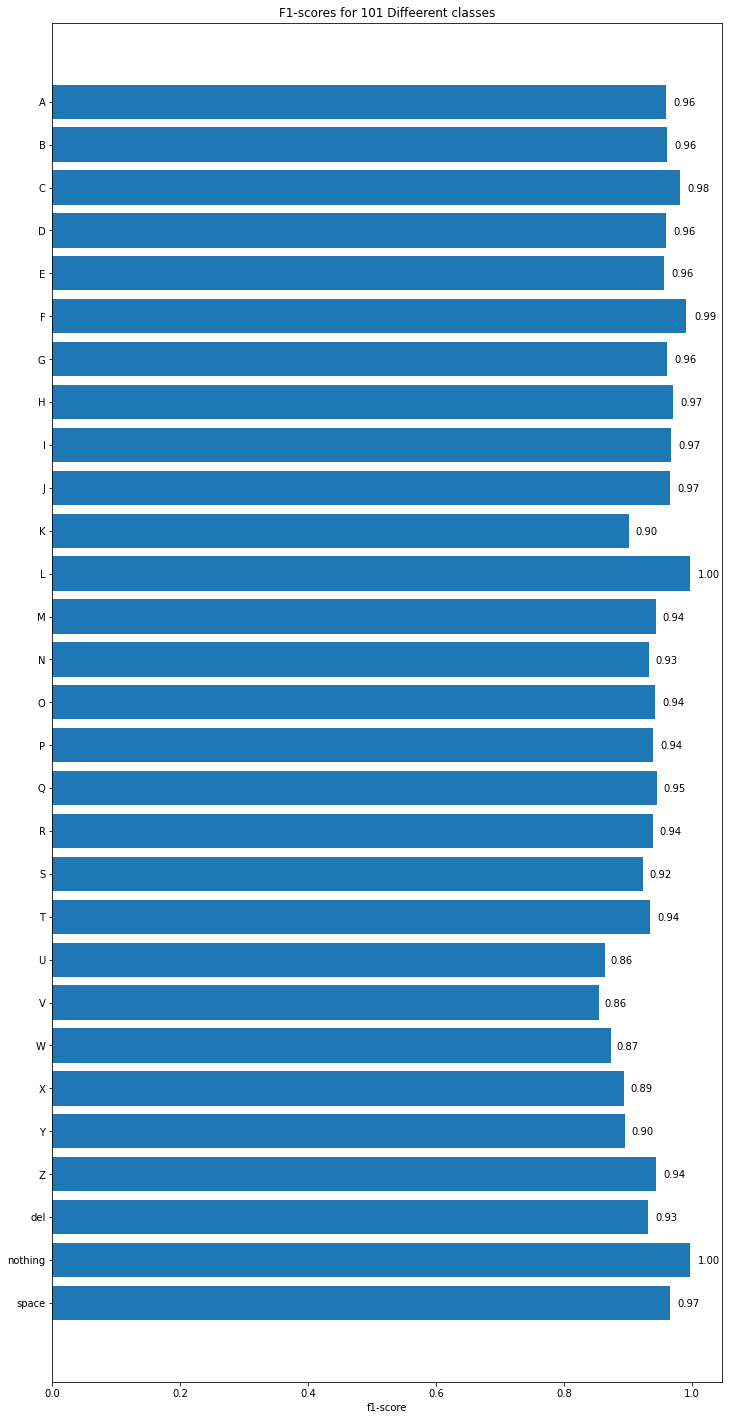

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,25))
scores = ax.barh(range(len(f1_score_ls)), f1_score_ls["f1_score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(class_names))
ax.set_xlabel("f1-score")
ax.set_title("F1-scores for 101 Diffeerent classes")
ax.invert_yaxis()

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

The modelis getting confused between `B-D` and `K-W`. We can improe this by using the additional data we;ve have. Sine we trained the model only on `60%` data. But as ML practioner we can experiment as long as we can but we set a foal of `90%` accuracy. We achieved it let's stop this projet here.

## Applicationize the asl model

In [ ]:
!pip3 install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaypchi","key":"345358925451baf591f62eaf7eb25c01"}'}

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:18<00:00, 59.4MB/s]
100% 1.03G/1.03G [00:18<00:00, 58.5MB/s]


### Data.py

In [ ]:
import string

In [ ]:
from typing import Dict, Tuple
import tensorflow as tf
import shutil
import os
import zipfile
from pathlib import Path
import numpy as np

# Function to unzip data
def unzip_data(data_dir: Path, zip_name: string):
    """
    Function to unzip dataset artifact
    Args:
        data_dir (Path): Posix path where the data resides
        zip_name (String): String name of the zipped dataset
    Returns:
        Unzipped dataset in DATA_DIR
    """

    # Unzipping the zipped artifact
    # Declaring the dataset name
    filename = str(data_dir) + zip_name
    # Initializing zipref instance
    zip_ref = zipfile.ZipFile(filename, "r")
    # logger.info("Unzipping dataset to directory")
    # Unzipping dataset
    zip_ref.extractall(path=data_dir)
    zip_ref.close()

    # Removing __MACOSX if present in data directory
    if "__MACOSX" in os.listdir(data_dir):
        shutil.rmtree(str(data_dir) + "/__MACOSX/")

In [ ]:
unzip_data(data_dir="/content/",
           zip_name="asl-alphabet.zip")

### Preprocessing function

In [ ]:
def get_label(filepath: str) -> str:
  """
  Function to get label name from filepath
  Args:
      filepath (str): filepath of the image
  Returns:
      label name
  """
  # for directory structure train -> class index -2 will be the class name
  return tf.strings.split(filepath, os.path.sep)[-2]

In [ ]:
# Function to preprocess images from directory and return images and labels
def process_path(image_path: str, img_size: int = 224, label_mode: str = None) -> Tuple:
    """
    Function to preprocess the image from data directory
    Args:
        image_path (str): Path to the image to be preprocessed
        label_mode (str): Encoding type of label, allowed values - onehot, sparse
        IMG_SIZE (int): Target size for reshaping the image
    Returns:
        Tuple of tf.image and tf.label
    """

    # logger.info(f"Using {label_mode} to encode the labels")
    # logger.info("{img_size} image size is used for preprocessing")

    # Load the image and resie it to target IMG_SIZE
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [img_size, img_size])

    # Get the label name
    label_name = get_label(image_path)
    print(label_name)
    label = label_name == class_names

    # Encoding the label
    if label_mode is "onehot":
      label = tf.one_hot(tf.argmax(label), depth=29)
    elif label_mode is "sparse":
      label = tf.argmax(label)

    return img, label

In [ ]:
TRAIN_DIR = Path("/content/asl_alphabet_train/asl_alphabet_train")
class_names = np.array(sorted([item.name for item in TRAIN_DIR.glob('*')]))

In [ ]:
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

In [ ]:
process_path(image_path="/content/asl_alphabet_train/asl_alphabet_train/B/B1.jpg",
             label_mode="onehot",
             img_size=224)

tf.Tensor(b'B', shape=(), dtype=string)


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.00000000e+00, 3.00000000e+00, 2.51000000e+02],
         [0.00000000e+00, 4.82142806e-01, 2.46803574e+02],
         [2.19642830e+00, 0.00000000e+00, 2.42339279e+02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 2.37607117e+02],
         [0.00000000e+00, 0.00000000e+00, 2.41678589e+02],
         [0.00000000e+00, 0.00000000e+00, 2.40000000e+02]],
 
        [[0.00000000e+00, 2.16071415e+00, 2.48482147e+02],
         [0.00000000e+00, 3.47257614e-01, 2.36537308e+02],
         [8.34119892e+00, 3.07238507e+00, 2.16456314e+02],
         ...,
         [5.14065075e+00, 0.00000000e+00, 1.97726013e+02],
         [7.04407871e-01, 1.34877890e-01, 2.11404266e+02],
         [0.00000000e+00, 8.39285731e-01, 2.18178574e+02]],
 
        [[7.32142806e-01, 5.35714388e-01, 2.42142853e+02],
         [6.26243591e+00, 2.54400492e+00, 2.15195801e+02],
         [2.86320133e+01, 1.94540787e+01, 1.72918686e+02],
         ...,
         [1

In [ ]:
len(class_names)

29

### Create dataset

In [ ]:
# Setting values for preprocessing function
img_size=248
label_mode="onehot"

# Function to create tf.data.Dataset for model training
def create_dataset(data_dir: Path, train_dir: string, train_data_percent: float = 0.6, batch_size: int = 32, cleanup: bool = True) -> tf.data.Dataset:
    """
    Load the data from data directory and preprocess it to a fast loading `tf.data.Dataset`
    Args:
        data_dir (Path): Posix path where the data resides
        train_data_percent (float): Percentage of data to be used for training from the entire dataset
        batch_size (int): Batch size for the dataset
        cleanup (bool): Cleanup the directory after creating the dataset to free up space
    Returns:
        Datasets needed for model training and evaluation
    """

    # logger.info(f"The data directory is: {data_dir}")
    # logger.info(f"Train data percent used for this iteration is: {train_data_percent}")

    # Getting the image count from train and test directory
    TRAIN_DIR = Path(os.path.join(data_dir, train_dir))
    # logger.info(f"Train directory is: {TRAIN_DIR}")
    print(f"Training dir: {TRAIN_DIR}")

    # Getting image count
    image_train_count = len(list(TRAIN_DIR.glob('*/*.jpg')))
    # logger.info(f"Train images count: {image_train_count}")
    print(f"Image train count: {image_train_count}")

    # Getting class_names
    class_names = np.array(sorted([item.name for item in TRAIN_DIR.glob('*')]))
    # logger.info(f"Class names in the dataset is: {class_names}")
    print(class_names)

    # Getting list of files
    train_ds = tf.data.Dataset.list_files(str(TRAIN_DIR) + '/*/*.jpg', shuffle=False)
    print(f"train_ds: {train_ds}")

    # Getting data based on train data percent
    print(f"Creating dataset using: {train_data_percent * 100} from entire dataset")
    train_size = int(image_train_count * train_data_percent)
    print(f"train_size: {train_size}")

    # logger.info(f"Using {train_size} images out of {image_train_count} training images")
    train_ds = train_ds.take(train_size)
    print(f"train_ds: {train_ds}")

    # Creating fast loading dataset
    # logger.info("Beggining dataset creation")
    train_dataset = train_ds.map(map_func=process_path, num_parallel_calls=tf.data.AUTOTUNE)
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

    # Clean up the train directory to free up space after creating the dataset
    if cleanup:
        # logger.info(f"Deleting training directory: {TRAIN_DIR}")
        shutil.rmtree(TRAIN_DIR)

    return train_dataset

In [ ]:
dataset = create_dataset(data_dir="/content/asl_alphabet_train",
                         train_dir="asl_alphabet_train/",
                         train_data_percent=0.8,
                          batch_size=32,
                          cleanup=False)

Training dir: /content/asl_alphabet_train/asl_alphabet_train
Image train count: 87000
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']
train_ds: <TensorSliceDataset shapes: (), types: tf.string>
Creating dataset using: 80.0 from entire dataset
train_size: 69600
train_ds: <TakeDataset shapes: (), types: tf.string>
Tensor("strided_slice:0", shape=(), dtype=string)


In [ ]:
# tf.data
train_1s_da = dataset.take(1)
for image, label in train_1s_da:
  print(f"Shape of the image: {image.shape,}")
  print(f"Shape of the label: {label.shape}")
  print(f"Image : {image[0]}")
  print(f"Label: {label[0]}")
  print(tf.reduce_max(image), tf.reduce_min(image))

Shape of the image: (TensorShape([32, 224, 224, 3]),)
Shape of the label: (32, 29)
Image : [[[0.00000000e+00 0.00000000e+00 2.43000000e+02]
  [0.00000000e+00 0.00000000e+00 2.41321426e+02]
  [0.00000000e+00 0.00000000e+00 2.35142853e+02]
  ...
  [3.92858887e+00 0.00000000e+00 2.39267853e+02]
  [8.39294434e-01 0.00000000e+00 2.40482117e+02]
  [0.00000000e+00 0.00000000e+00 2.43000000e+02]]

 [[0.00000000e+00 8.39285731e-01 2.43839279e+02]
  [0.00000000e+00 1.34885192e-01 2.26663910e+02]
  [7.37372351e+00 3.07238507e+00 2.07686218e+02]
  ...
  [7.24072981e+00 1.79844010e+00 1.97168564e+02]
  [9.83170033e+00 5.77014065e+00 2.18525803e+02]
  [3.35714293e+00 8.39285731e-01 2.20339279e+02]]

 [[0.00000000e+00 2.67857194e-01 2.39607147e+02]
  [6.14477015e+00 3.11543369e+00 2.08403702e+02]
  [6.70302811e+01 5.61004372e+01 1.99866074e+02]
  ...
  [7.42385483e+01 6.95784760e+01 1.77065811e+02]
  [5.91956635e+01 5.43994141e+01 2.05862854e+02]
  [9.85714245e+00 6.12499952e+00 1.78660721e+02]]

 ..

In [ ]:
dataset

<PrefetchDataset shapes: ((None, 224, 224, None), (None, 29)), types: (tf.float32, tf.bool)>